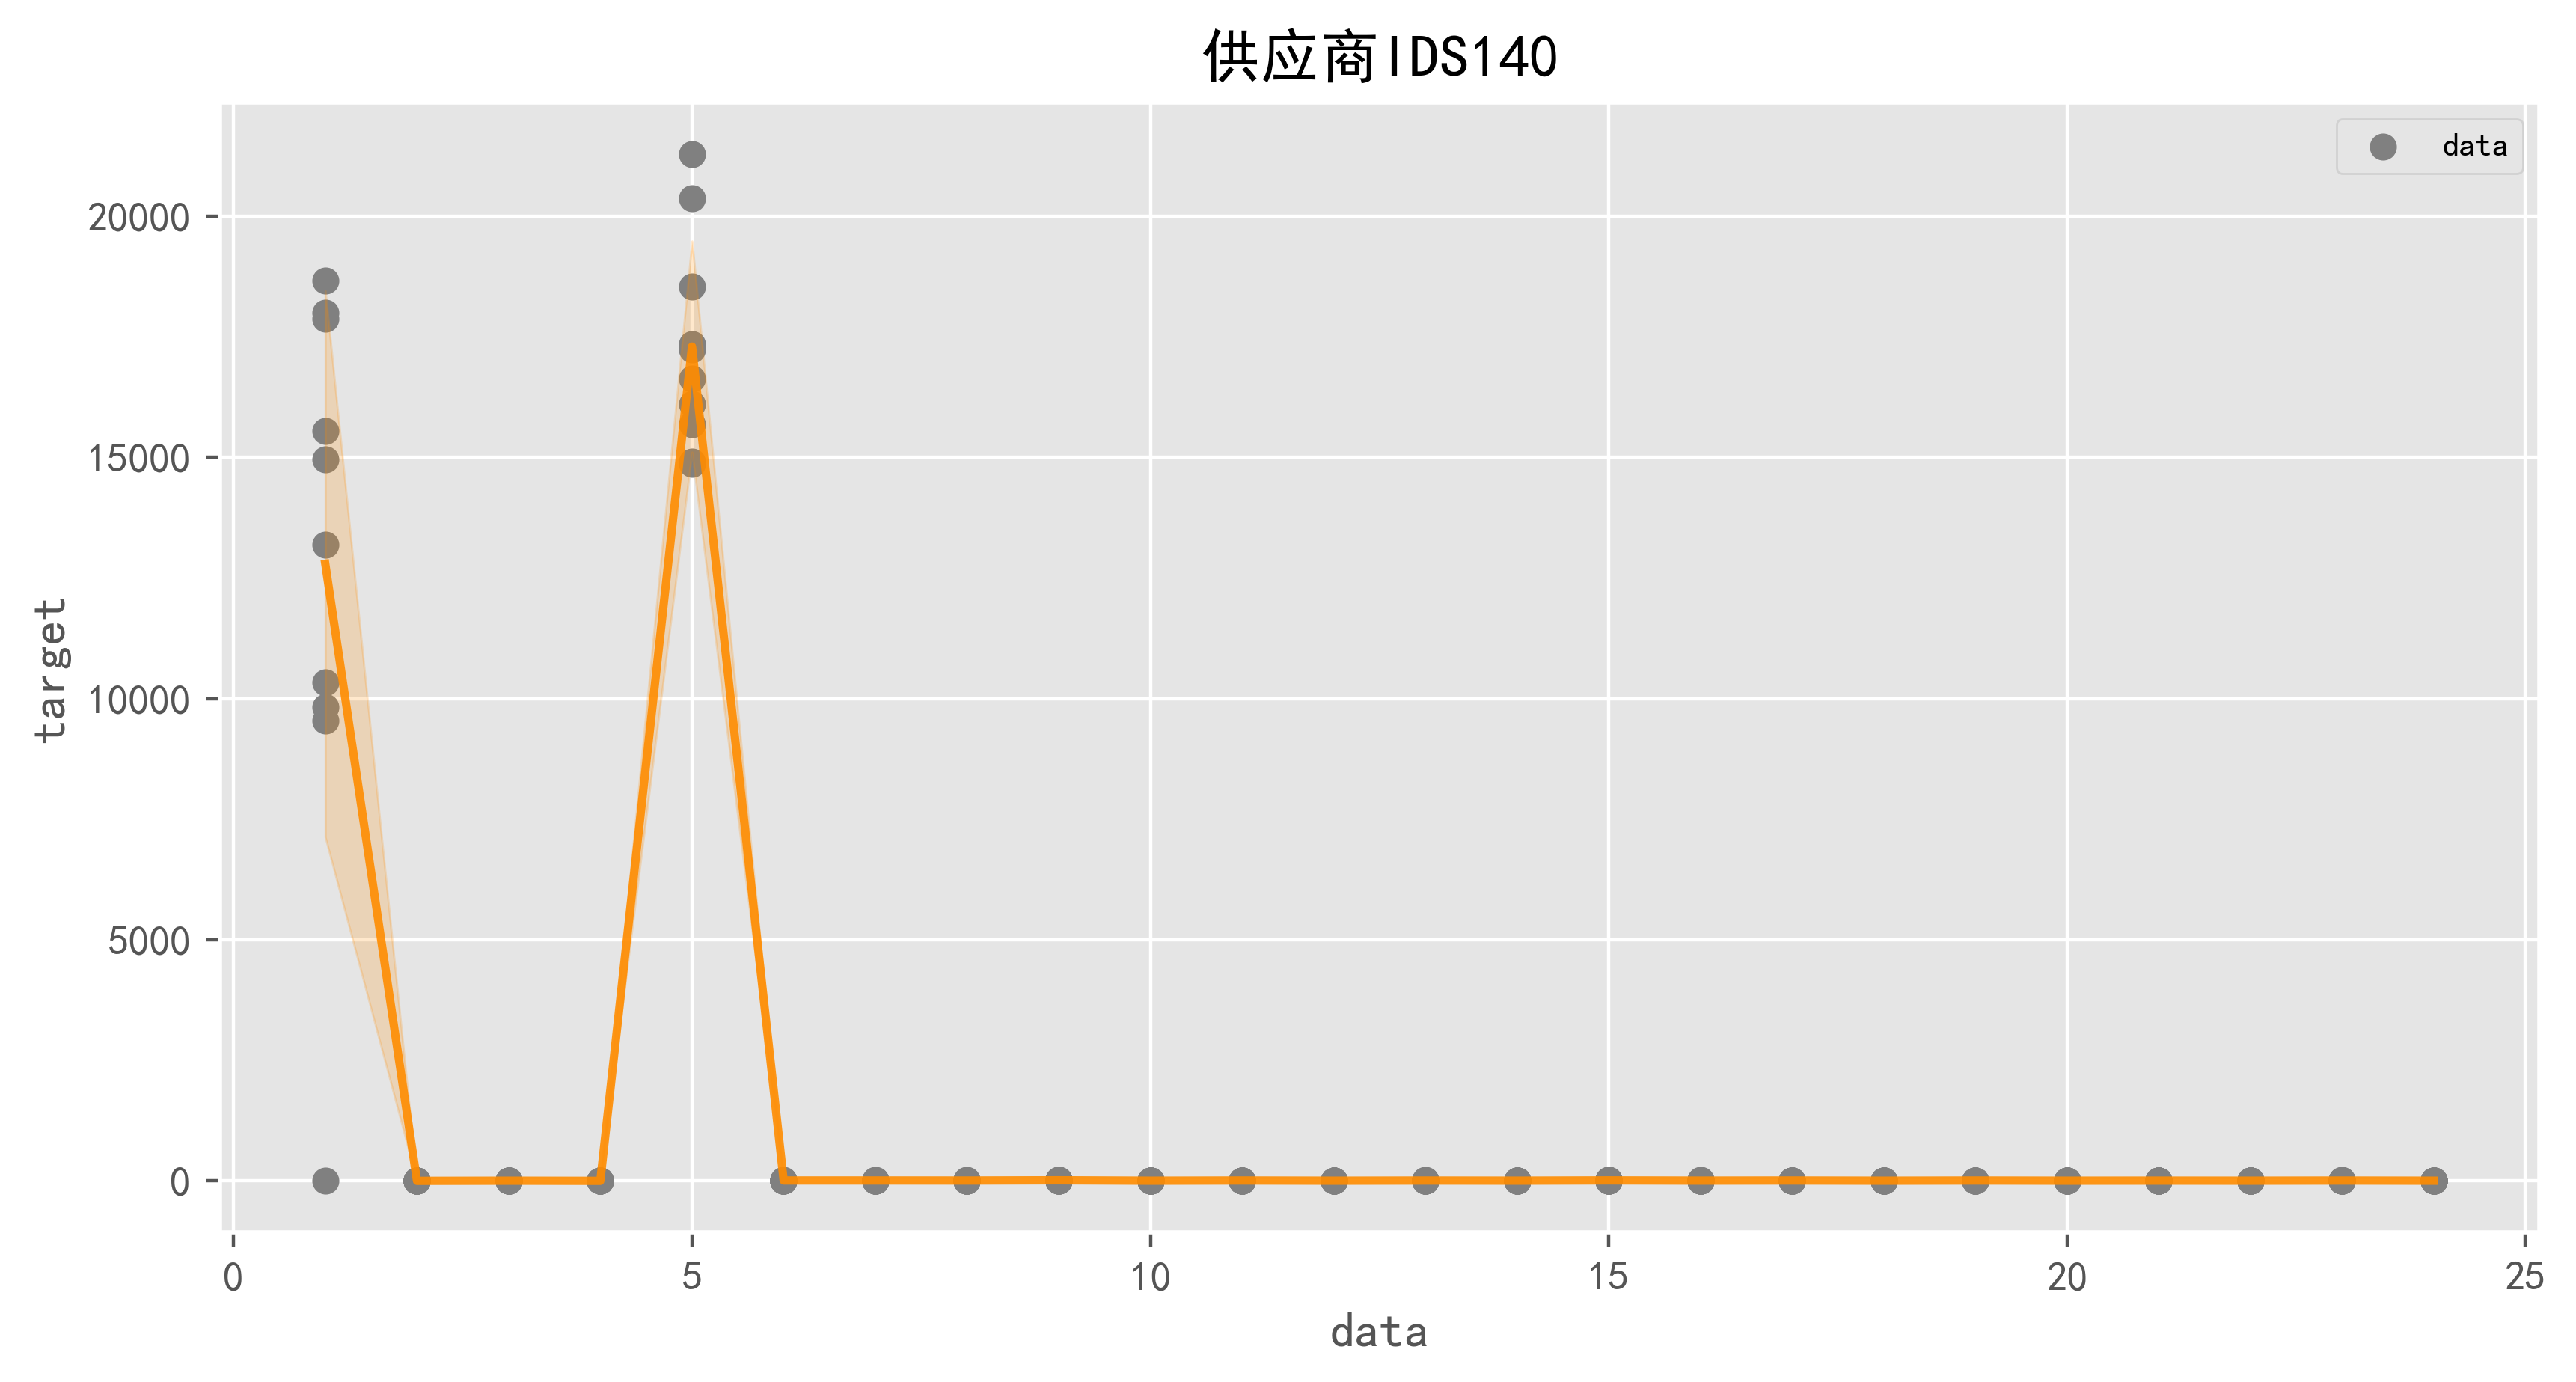

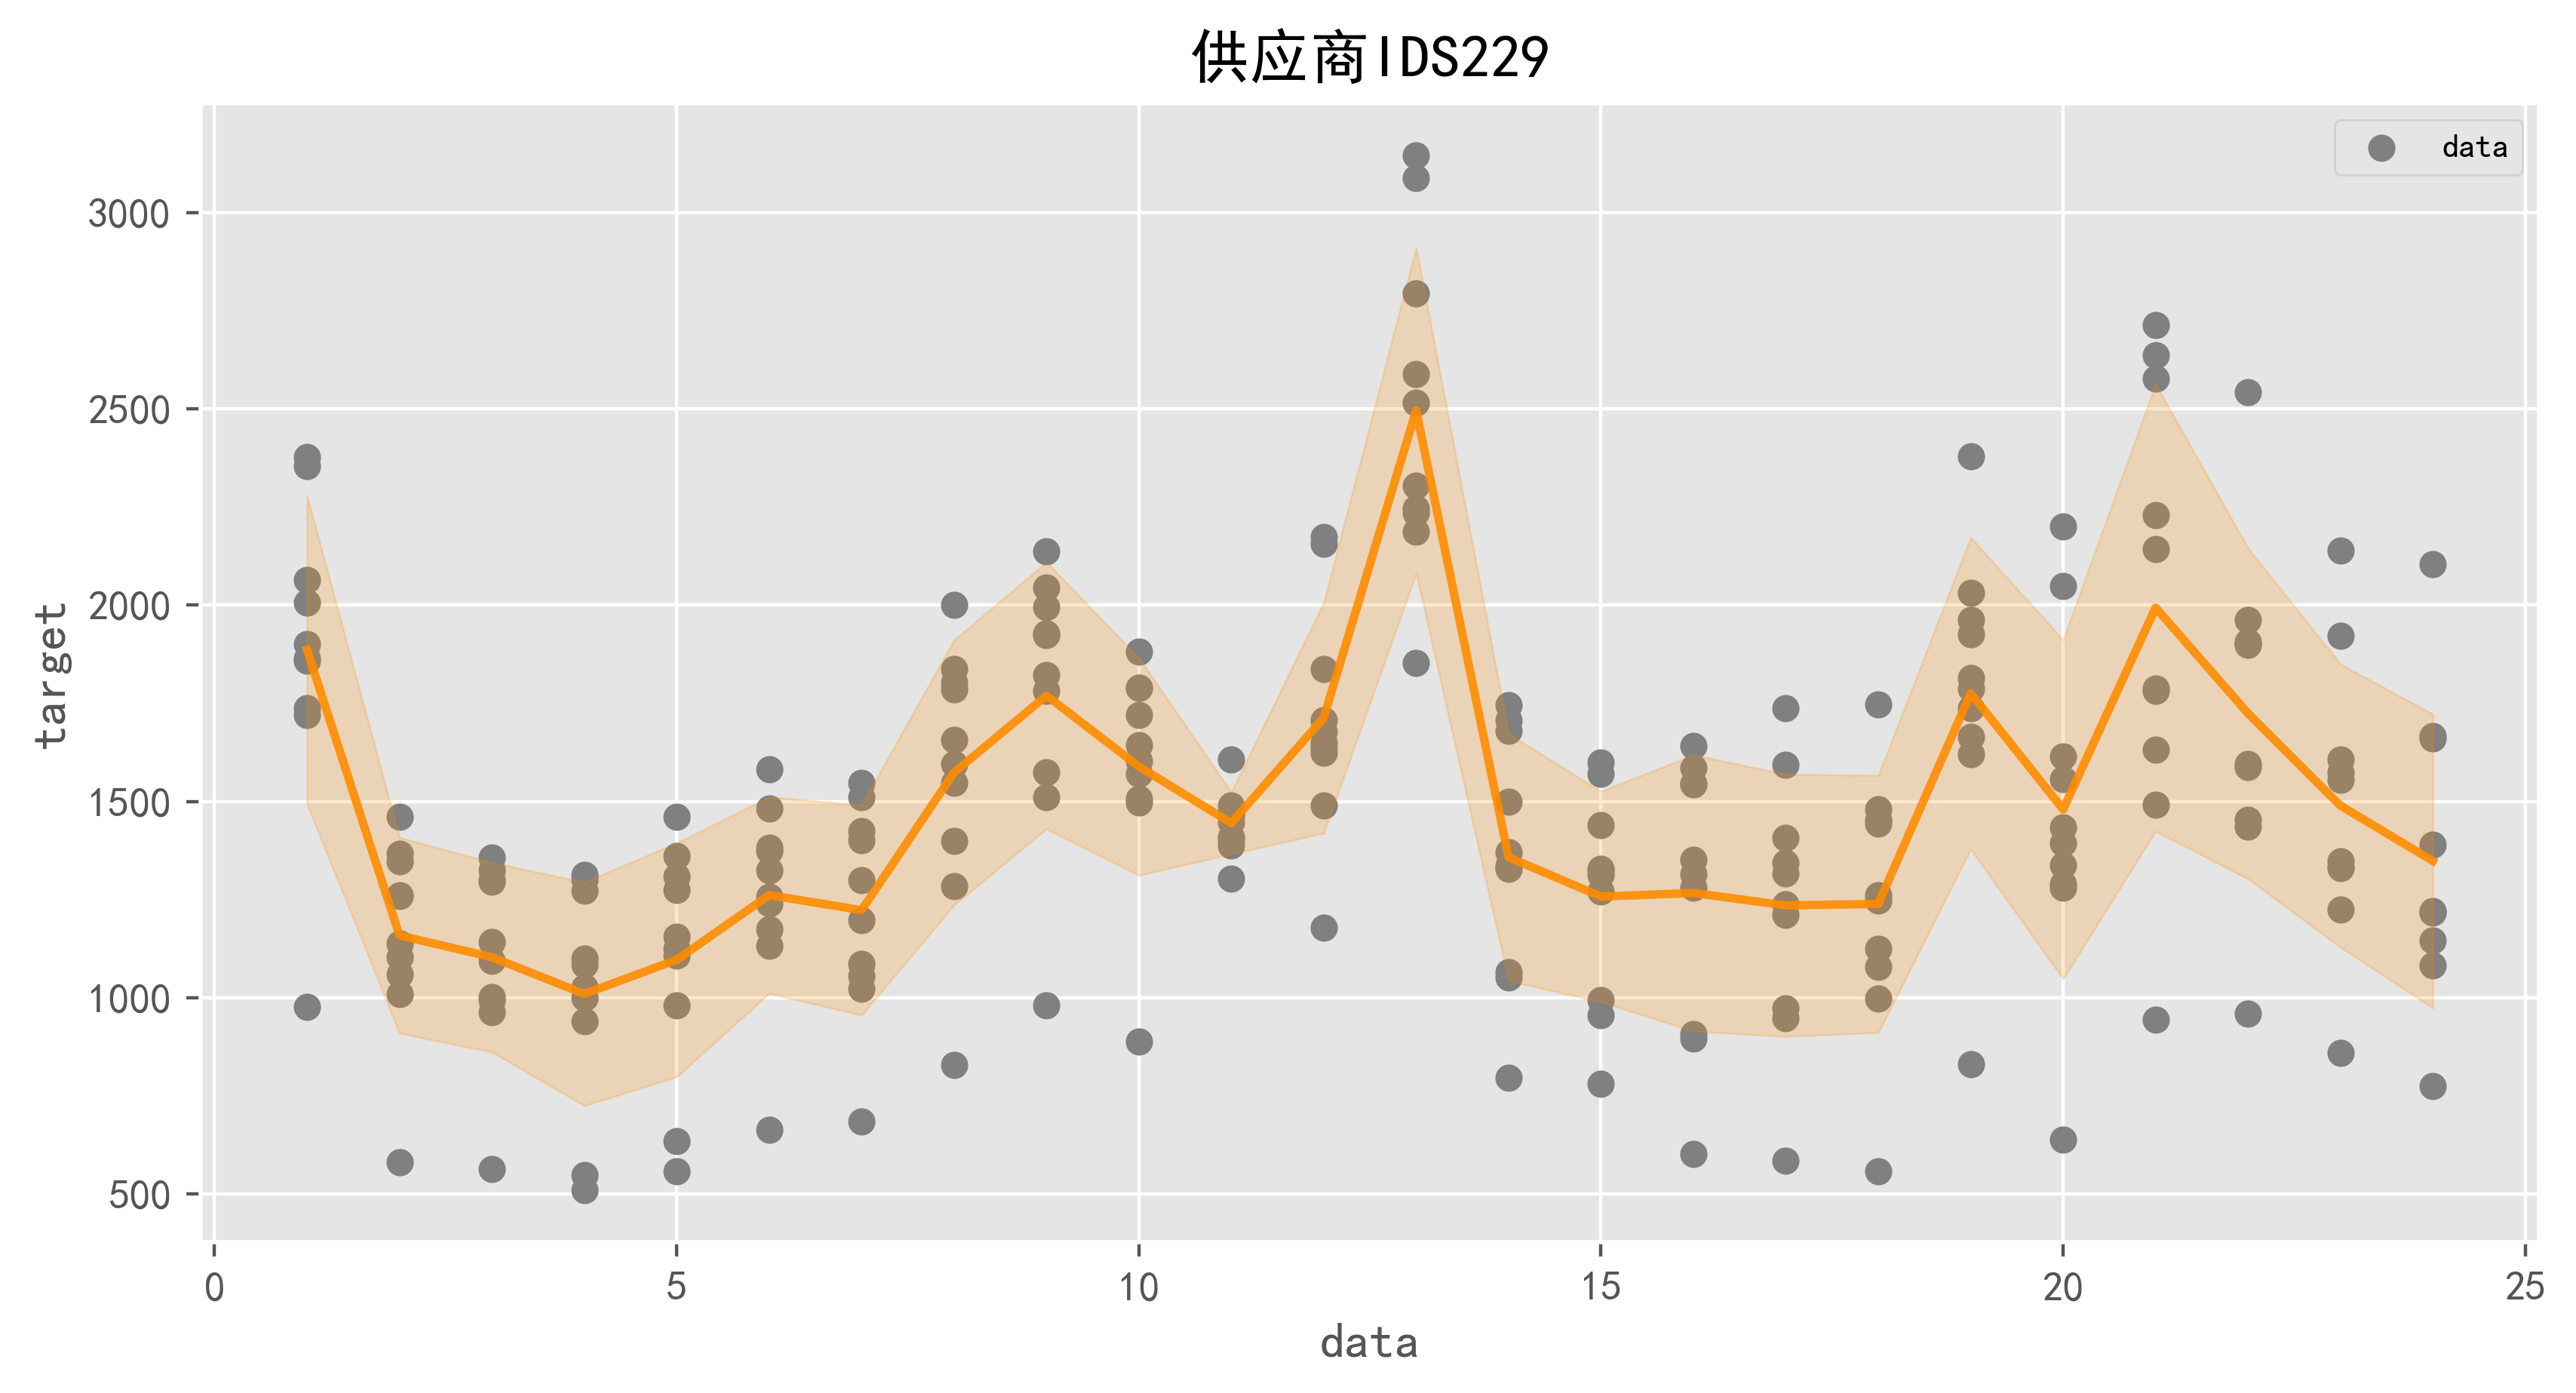

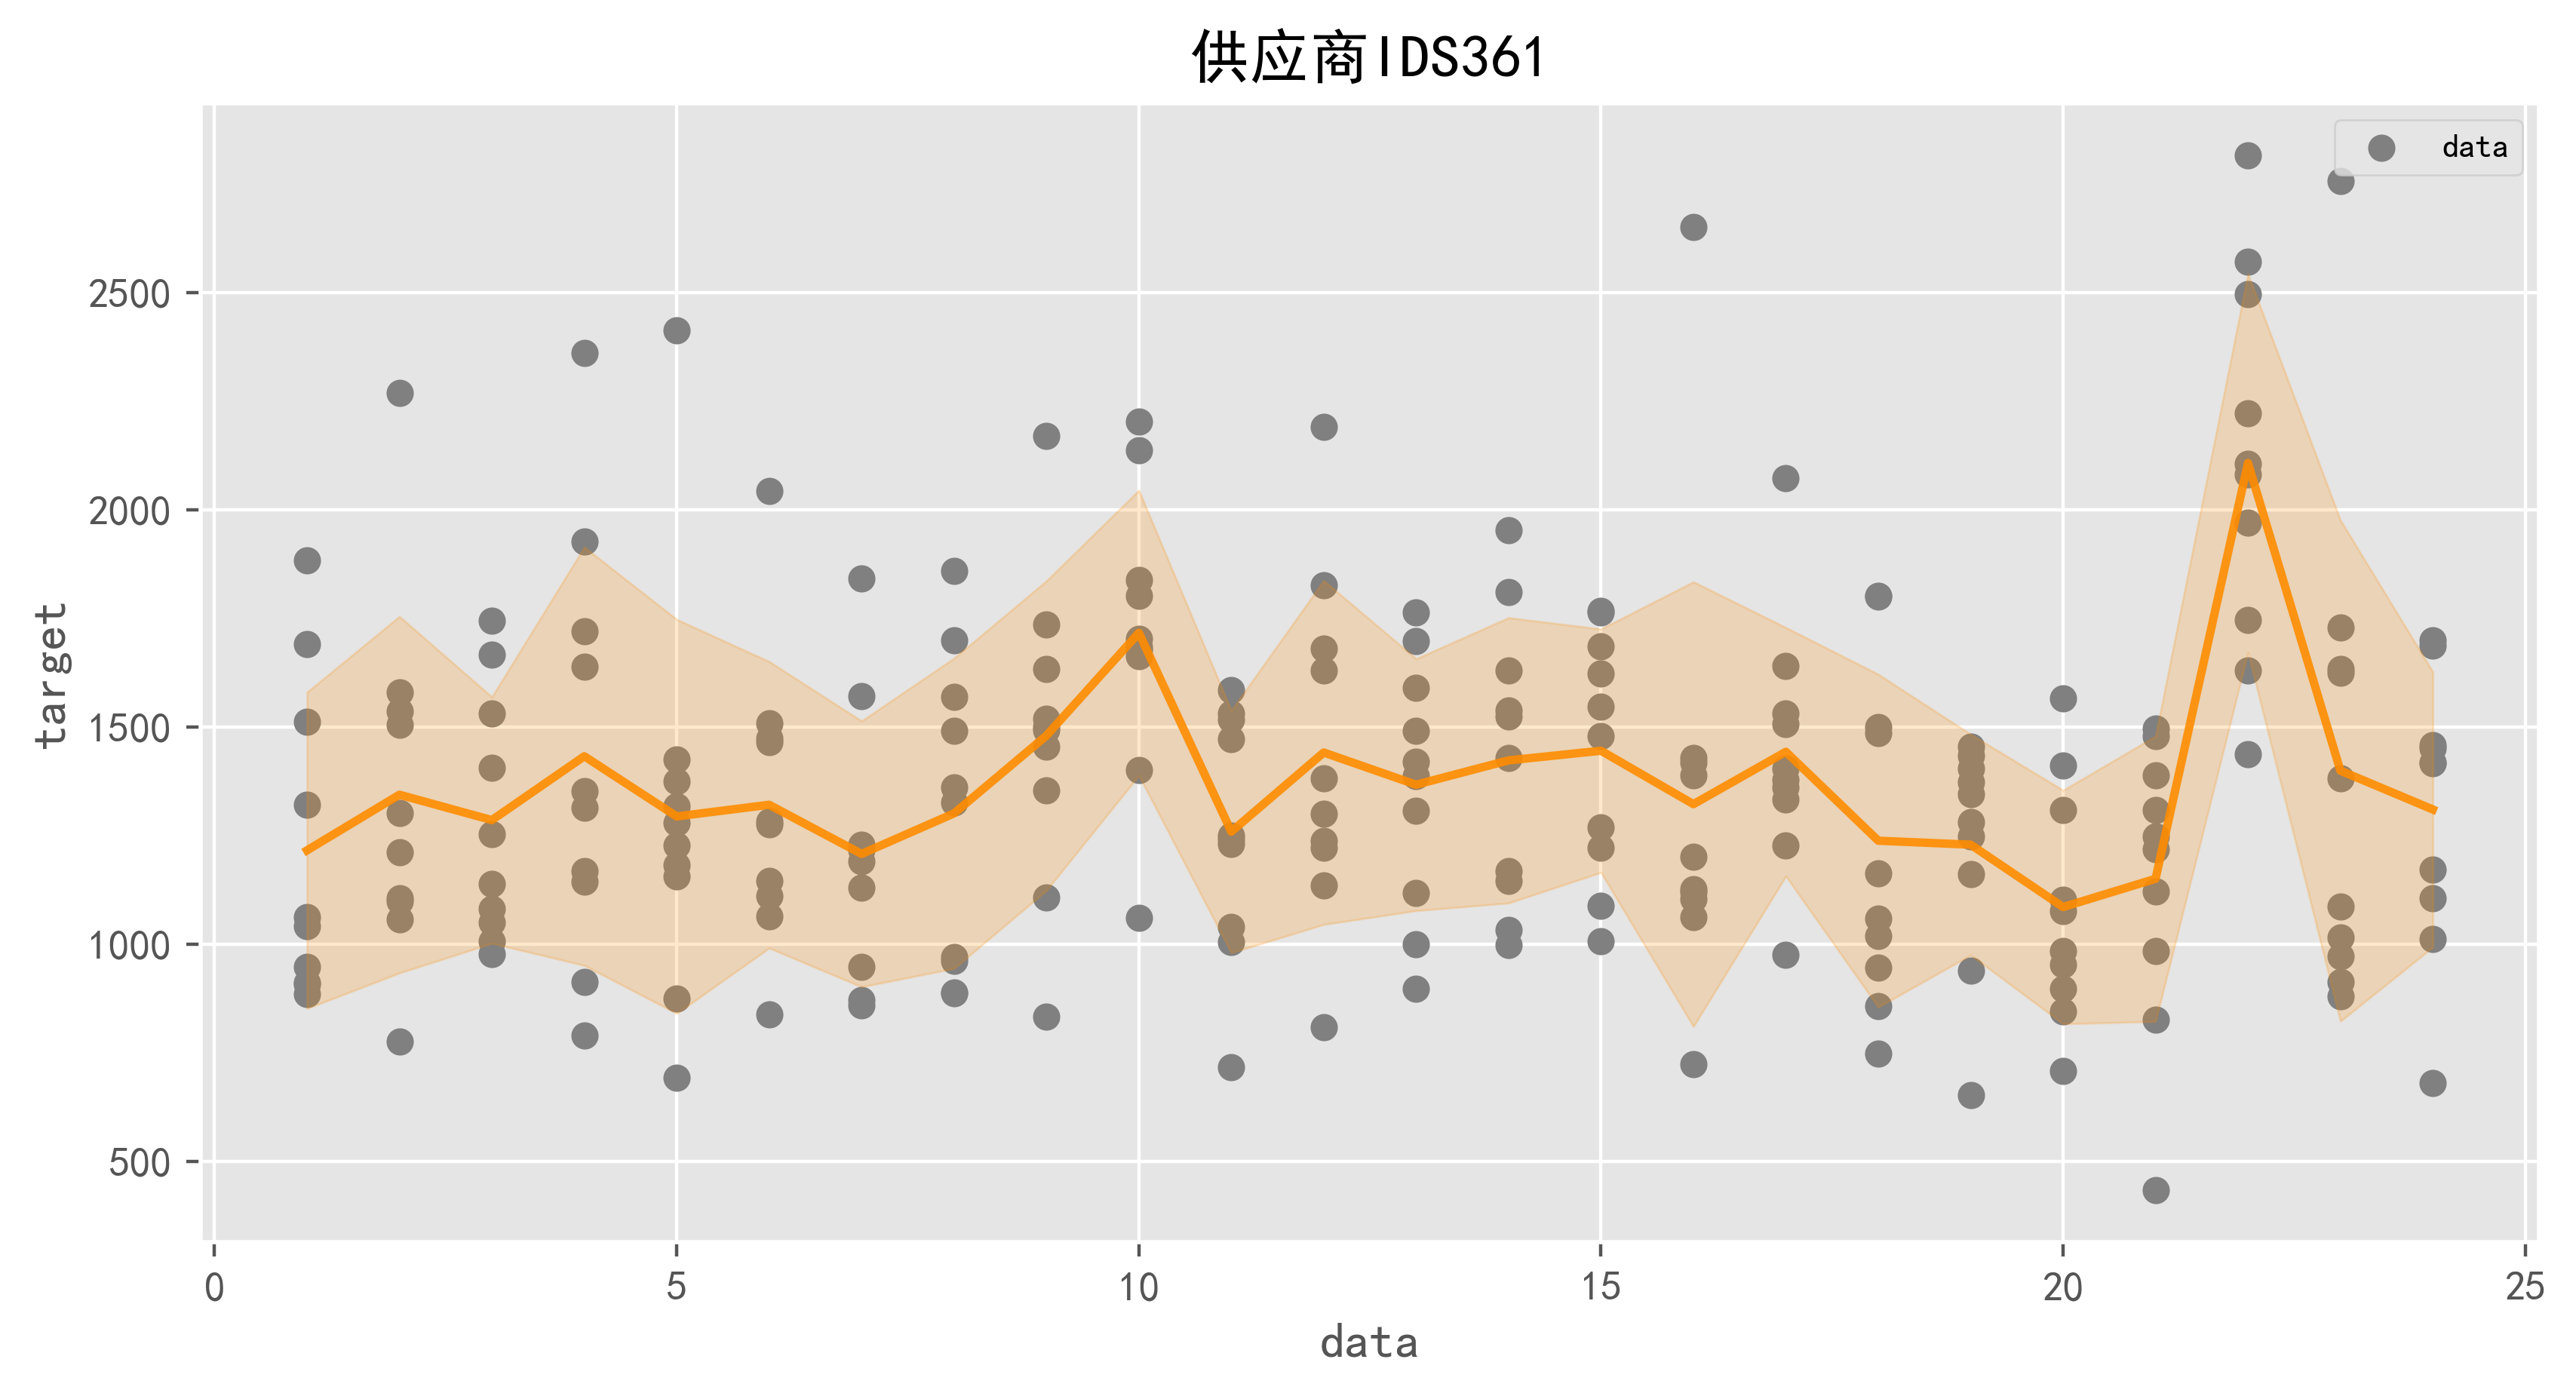

In [26]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

%matplotlib inline
select_supplier=['S140','S229','S361']
file0=pd.read_excel('附件1 近5年402家供应商的相关数据.xlsx',0)
file1=pd.read_excel('附件1 近5年402家供应商的相关数据.xlsx',1)

for supplier in select_supplier:
    plt.figure(figsize=(10,5),dpi=400)
    lw=2
    X=np.tile(np.arange(1,25),(1,10)).T
    X_plot=np.linspace(1,24,24)
    y=np.array(file1[file1['供应商ID']==supplier].iloc[:,2:]).ravel()
    descrip=pd.DataFrame(np.array(file1[file1['供应商ID']==supplier].iloc[:,2:]).reshape(-1,24)).describe()
    y_mean=descrip.loc['mean',:]
    y_std=descrip.loc['std',:]
    plt.scatter(X,y,c='grey',label='data')
    plt.plot(X_plot,y_mean,color='darkorange',lw=lw,alpha=0.9)
    plt.fill_between(X_plot,y_mean-1.*y_std,y_mean+1.*y_std,color='darkorange',alpha=0.2)
    plt.xlabel('data')
    plt.ylabel('target')
    plt.title(f'供应商ID{supplier}')
    plt.legend(loc='best',prop={'size':8})
    plt.show()


In [30]:
np.logspace(0,4,30).shape

(30,)

(96480,)
(37,)


Text(0.5, 1.0, '企业订货量统计')

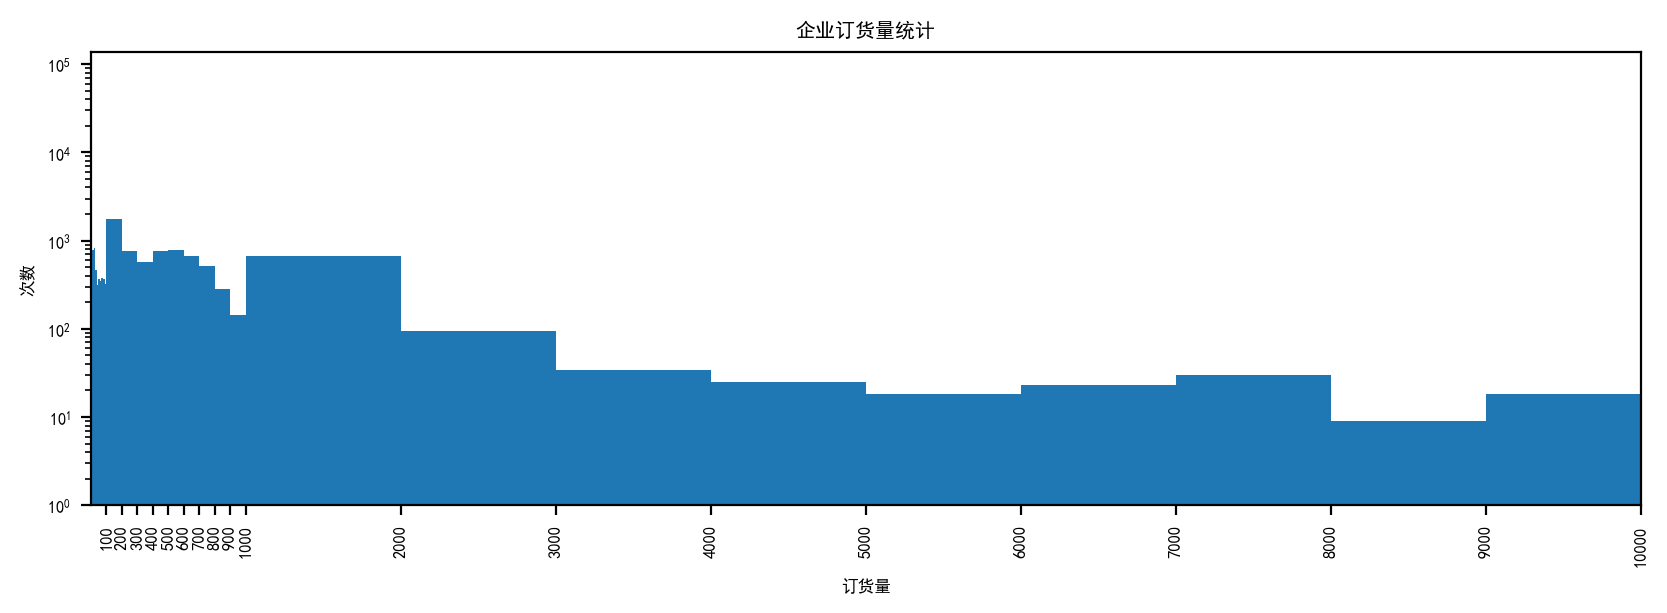

In [93]:
h = file0.iloc[:, 2:].values.ravel()
print(h.shape)
plt.figure(figsize=(10, 3), dpi=200)
bins_1 = np.concatenate([
    np.linspace(0, 10, 10),
    np.linspace(20, 100, 9),
    np.linspace(200, 1000, 9),
    np.linspace(2000, 10000, 9)
])
print(bins_1.shape)
plt.hist(h, bins=bins_1, bottom=1, log=True)
plt.xlim([0, 10000])
plt.xticks(bins_1[18:], rotation=90, fontsize=6)

plt.ylabel("次数")
plt.xlabel("订货量")
plt.title("企业订货量统计")

In [86]:
count,bins_c=np.histogram(h,bins=bins_1)
plt.rcParams['font.size']=6
fig,ax=plt.figure(figsize=(12,5),dpi=200)
plt.bar(np.arange(36),count,log=True,align='edge')


AttributeError: module 'matplotlib.pyplot' has no attribute 'subfigures'

In [54]:
np.linspace(200,1000,9)

array([ 200.,  300.,  400.,  500.,  600.,  700.,  800.,  900., 1000.])

### 转运商图片

In [5]:
import pandas as pd
files=pd.read_excel(r"C:\Users\ZuYong\Documents\VScode\Math_models_algorithm\2021C\附件2 近5年8家转运商的相关数据.xlsx",index_col=0)


In [96]:
np.argmax(files.iloc[0,:])

82

Text(0.5, 1.0, 'T1')

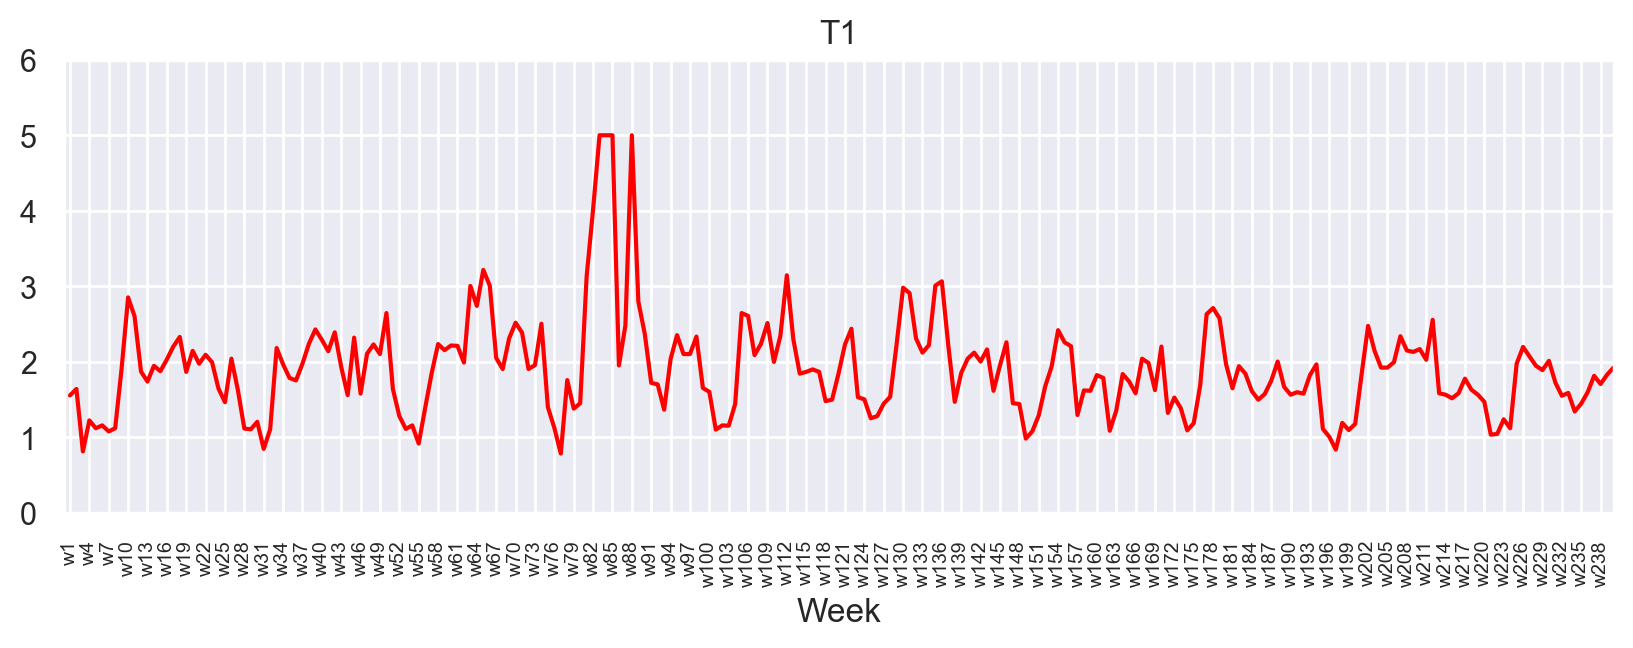

In [115]:
plt.figure(figsize=(10,3),dpi=200)
plt.plot(np.linspace(1,240,240),np.array(files2.iloc[0,:].values),c='red')
plt.xlim([0,240])
plt.ylim([0,6])
loca=[i for i in range(1,240,3)]
labels=['w'+str(i) for i in loca]
plt.xticks(loca,labels,rotation=90,fontsize=7)
plt.xlabel("Week")
plt.title("T"+str(1))

Text(0.5, 1.0, 'T2')

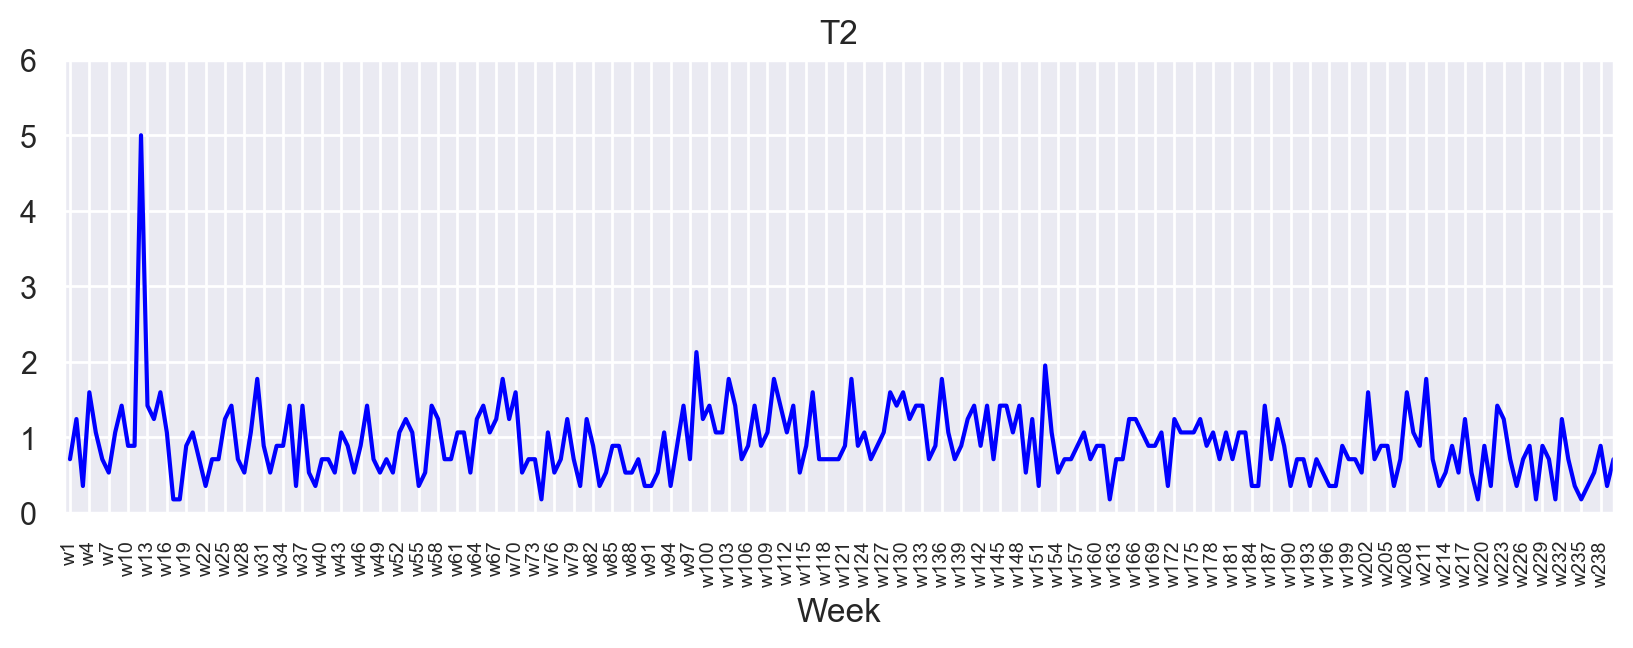

In [114]:
plt.figure(figsize=(10,3),dpi=200)
plt.plot(np.linspace(1,240,240),np.array(files2.iloc[1,:].values),c='blue')
plt.xlim([0,240])
plt.ylim([0,6])
loca=[i for i in range(1,240,3)]
labels=['w'+str(i) for i in loca]
plt.xticks(loca,labels,rotation=90,fontsize=7)
plt.xlabel("Week")
plt.title("T"+str(2))

Text(0.5, 1.0, 'T6')

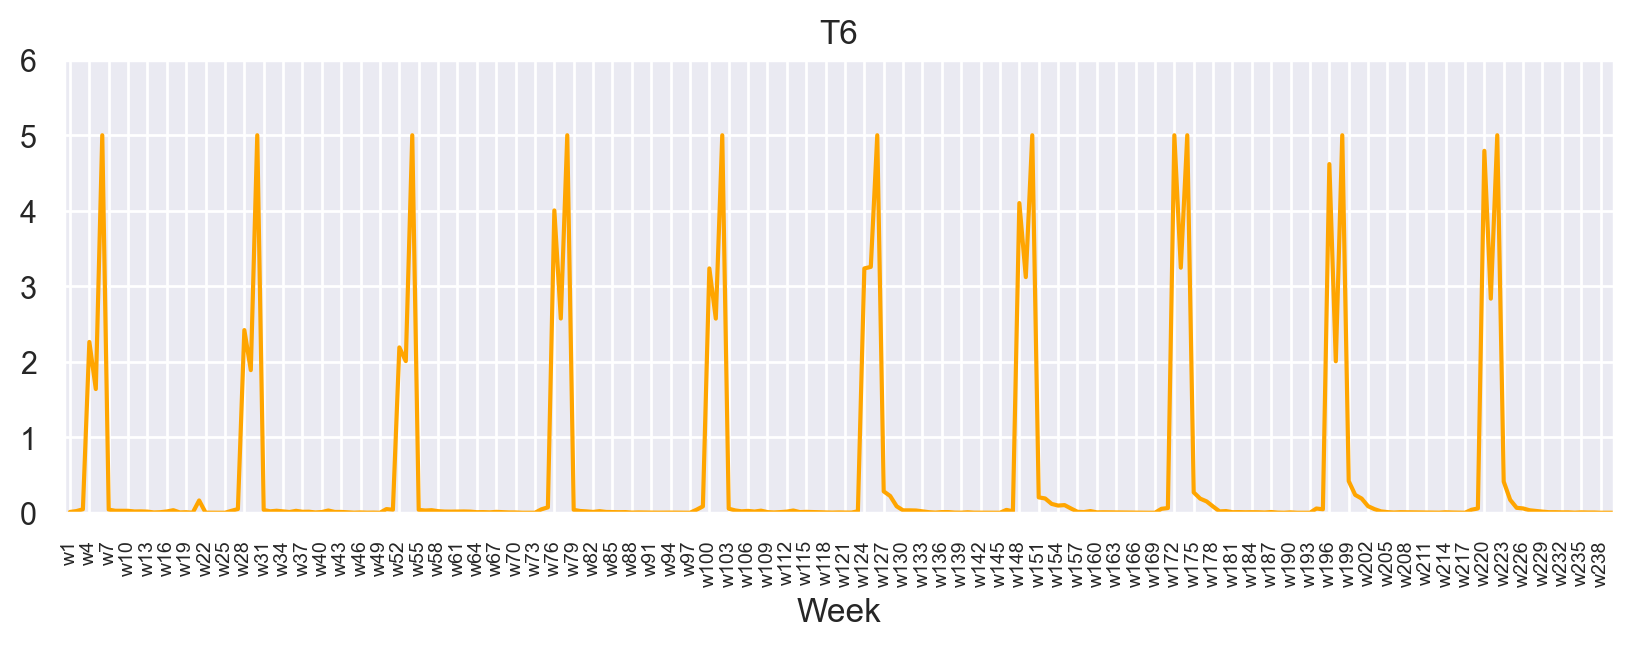

In [111]:
plt.figure(figsize=(10,3),dpi=200)
plt.plot(np.linspace(1,240,240),np.array(files2.iloc[5,:].values),c='orange')
plt.xlim([0,240])
plt.ylim([0,6])
loca=[i for i in range(1,240,3)]
labels=['w'+str(i) for i in loca]
plt.xticks(loca,labels,rotation=90,fontsize=7)
plt.xlabel("Week")
plt.title("T"+str(6))

Text(0.5, 1.0, 'T7')

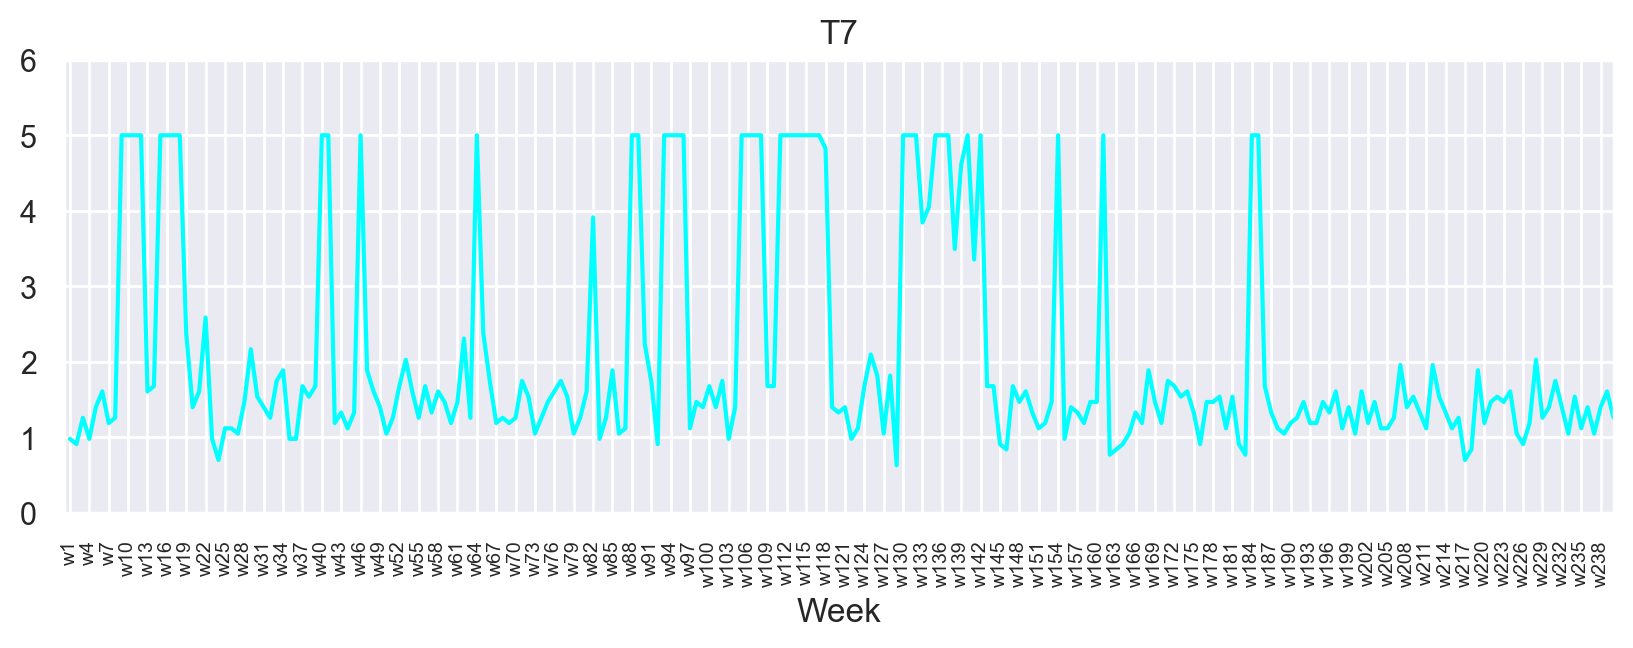

In [117]:
plt.figure(figsize=(10,3),dpi=200)
plt.plot(np.linspace(1,240,240),np.array(files2.iloc[6,:].values),c='cyan')
plt.xlim([0,240])
plt.ylim([0,6])
loca=[i for i in range(1,240,3)]
labels=['w'+str(i) for i in loca]
plt.xticks(loca,labels,rotation=90,fontsize=7)
plt.xlabel("Week")
plt.title("T"+str(7))

Text(0.5, 1.0, 'T8')

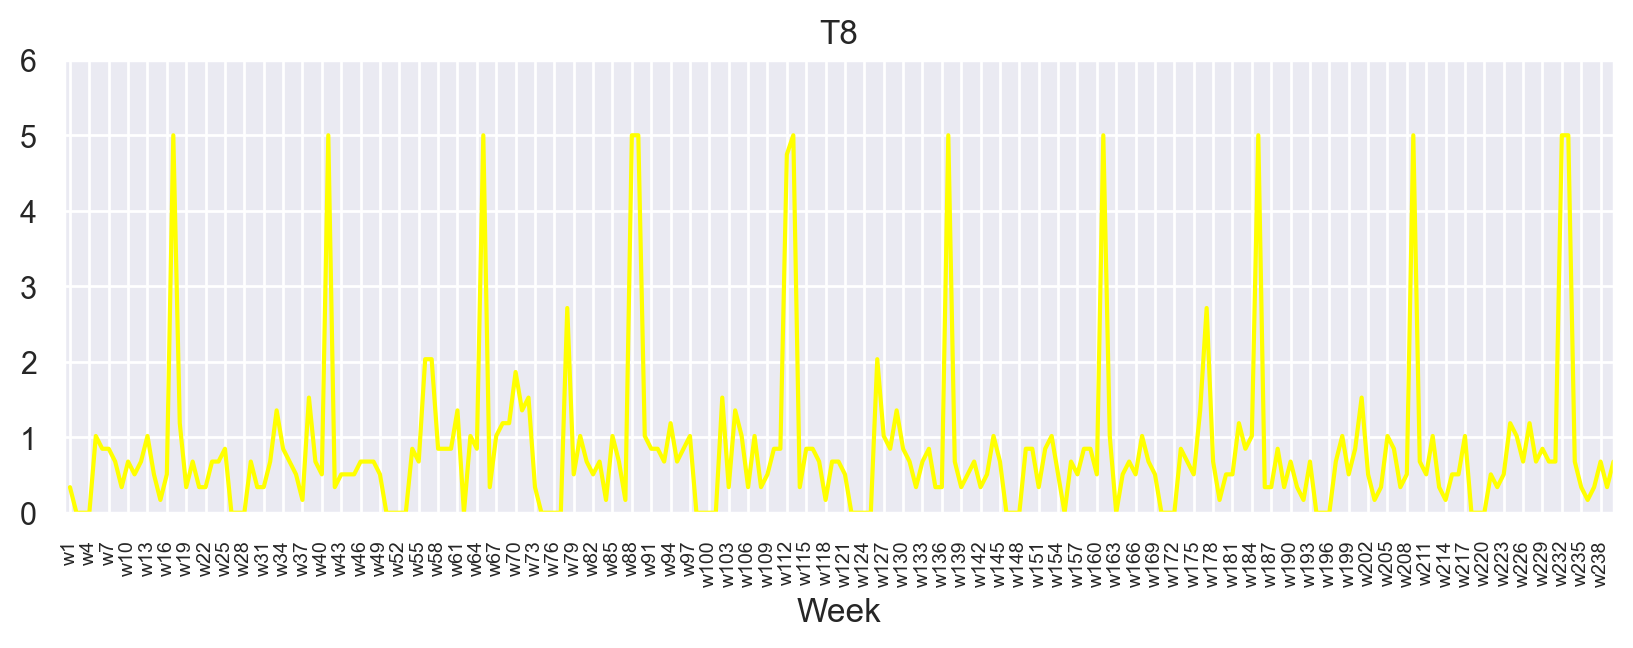

In [119]:
plt.figure(figsize=(10,3),dpi=200)
plt.plot(np.linspace(1,240,240),np.array(files2.iloc[7,:].values),c='yellow')
plt.xlim([0,240])
plt.ylim([0,6])
loca=[i for i in range(1,240,3)]
labels=['w'+str(i) for i in loca]
plt.xticks(loca,labels,rotation=90,fontsize=7)
plt.xlabel("Week")
plt.title("T"+str(8))

Text(0.5, 1.0, 'T3')

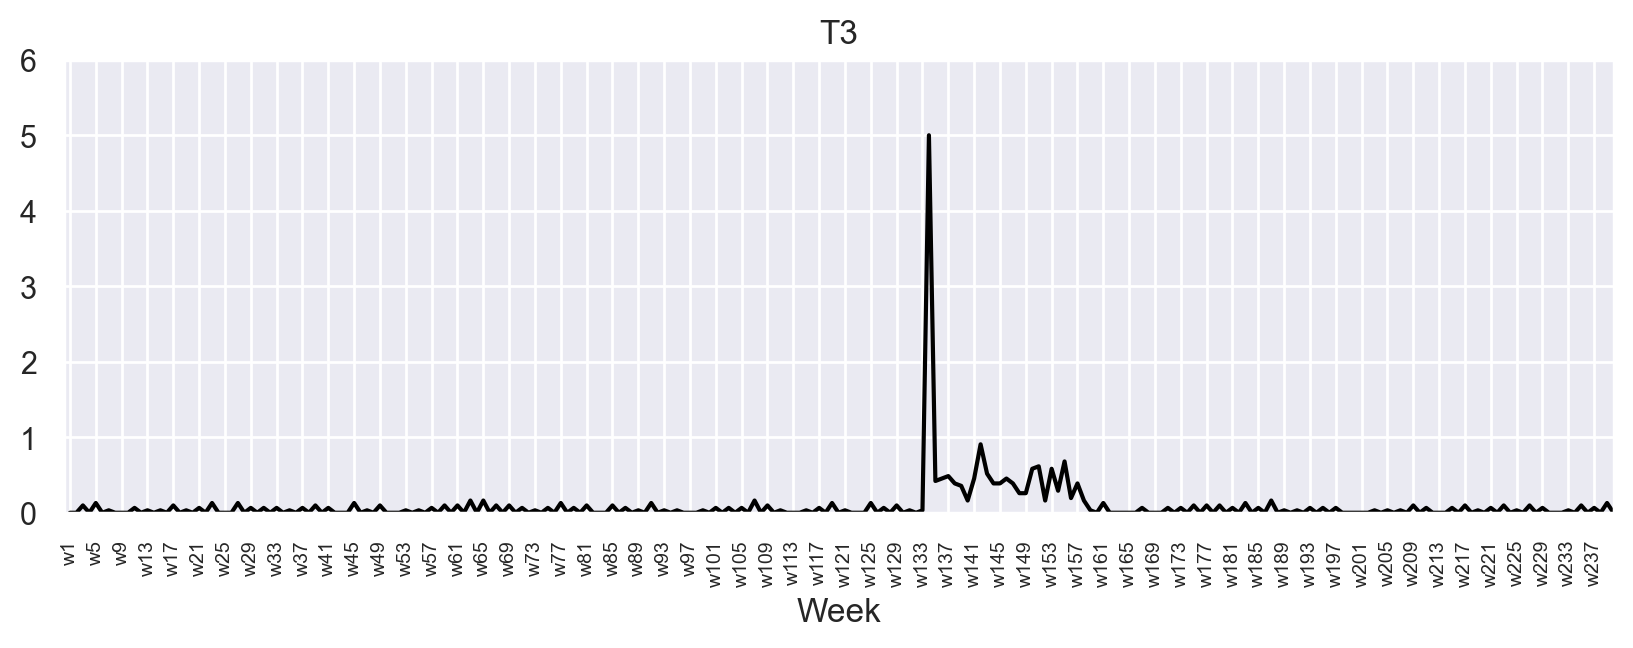

In [120]:
plt.figure(figsize=(10,3),dpi=200)
plt.plot(np.linspace(1,240,240),np.array(files2.iloc[2,:].values),c='black')
plt.xlim([0,240])
plt.ylim([0,6])
loca=[i for i in range(1,240,4)]
labels=['w'+str(i) for i in loca]
plt.xticks(loca,labels,rotation=90,fontsize=7)
plt.xlabel("Week")
plt.title("T"+str(3))

### 


In [7]:
files.values.shape

(8, 240)

## gorubi


In [4]:
from gurobipy import *
# 8部电影
# 7个影厅
# 8个时段
I = list(range(8))  # 时段
J = list(range(7))  # 影厅
K = list(range(8))  # 电影

seat_j = [118, 86, 116, 85, 156, 142, 156]
# 一行为一个影厅,一列为一部电影
price_jk = [[60, 60, 65, 60, 65, 90, 60, 65],
            [65, 65, 85, 75, 60, 75, 85, 80],
            [60, 70, 75, 80, 75, 80, 80, 75],
            [65, 65, 80, 75, 80, 75, 75, 80],
            [60, 65, 65, 60, 75, 80, 80, 75],
            [60, 65, 65, 80, 75, 75, 80, 75],
            [60, 60, 75, 80, 75, 70, 60, 75]]
# 一行为一个时段,一列为一部电影
rate_ik = [[0.50, 0.55, 0.45, 0.50, 0.60, 0.46, 0.55, 0.45],
           [0.42, 0.43, 0.41, 0.43, 0.45, 0.30, 0.53, 0.36],
           [0.58, 0.63, 0.67, 0.64, 0.70, 0.64, 0.54, 0.57],
           [0.62, 0.67, 0.70, 0.65, 0.75, 0.64, 0.53, 0.66],
           [0.65, 0.65, 0.73, 0.68, 0.75, 0.74, 0.67, 0.72],
           [0.66, 0.69, 0.78, 0.78, 0.78, 0.75, 0.74, 0.70],
           [0.67, 0.92, 0.87, 0.87, 0.75, 0.59, 0.68, 0.68],
           [0.67, 0.92, 0.87, 0.87, 0.75, 0.59, 0.68, 0.68]]
# 计算满座的票房二维列表,lt_all
all_jk = [[0 for col in K] for row in J]
for j in J:
    for k in K:
        all_jk[j][k] = price_jk[j][k] * seat_j[j]
# 创建模型
m = Model("ass_mov")
# 创建变量.第i个时段在第j个影厅放映第k部电影
x = m.addVars(I, J, K, vtype=GRB.BINARY)
# 更新变量环境
m.update()
# 创建目标函数
m.setObjective(sum(x[i, j, k] * rate_ik[i][k] * all_jk[j][k]
                   for i in I for j in J for k in K),
                   GRB.MAXIMIZE)
# 创建约束条件约束条件
# 每部电影至少放映一次
m.addConstrs(sum(x[i,j,k] for i in I for j in J) >= 1 for k in K) 
# 每个时段每个影厅只能放映一部电影
m.addConstrs(sum(x[i,j,k] for k in K) == 1 for i in I for j in J)
# 求解规划模型
m.optimize()

# 输出结果
result = [[0 for col in J] for row in I]
solution = m.getAttr('x',x)
# 得到排片矩阵
for k,v in solution.items():
    if v == 1:
        result[k[0]][k[1]] = k[2] + 1
# 得到最大收益值
max_get = sum(
    x[i, j, k].x * rate_ik[i][k] * all_jk[j][k] 
    for i in I for j in J for k in K
)
# 打印最大收益值,和排片矩阵
print('最大收益为:',max_get)
print('最佳排片方法:')
print('\n影厅j|', J)
print('-'*28)
for idx,l in enumerate(result) :
    print(f'时段{idx}|',l)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 64 rows, 448 columns and 896 nonzeros
Model fingerprint: 0xae490d04
Variable types: 0 continuous, 448 integer (448 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+03, 1e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 325324.25000
Presolve time: 0.00s
Presolved: 64 rows, 448 columns, 896 nonzeros
Variable types: 0 continuous, 448 integer (448 binary)
Found heuristic solution: objective 381565.75000

Root relaxation: objective 3.865421e+05, 65 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    386542.15000 386542.150  0.00%     -    0s

Explored 1 nodes (65 simpl

## 规划建模

In [5]:
file0=pd.read_excel('附件1 近5年402家供应商的相关数据.xlsx',1,index_col=0)
class_abc=file0['材料分类']
file0=file0.drop(columns="材料分类")

In [10]:
select_top50 = [
    229, 140, 361, 108, 201, 151, 282, 275, 329, 340, 139, 308, 330, 131, 348,
    356, 268, 395, 306, 352, 194, 143, 307, 374, 247, 284, 365, 31, 364, 40,
    126, 367, 55, 218, 338, 346, 80, 294, 37, 7, 244, 266, 114, 98, 291, 76,
    123, 150, 86, 314
]
select=['S'+str(i).rjust(3,'0') for i in select_top50]


In [7]:
file_d=pd.read_excel('附件1 近5年402家供应商的相关数据.xlsx',0,index_col=0)
file_d=file_d.drop(columns="材料分类")
# weiyue_p=

In [11]:
averp=np.array(file0.iloc[:,:].values,dtype=np.float32)
a=np.sum(averp*(averp>0),axis=1)/np.sum(averp>0,axis=1)
tmp=[i-1 for i in select_top50]
print(a[tmp])
provide_abc=np.nan_to_num(a[tmp]).tolist()

print(provide_abc)
np.sum(provide_abc)

[1.47869583e+03 1.37921005e+03 1.36700000e+03 1.00395833e+03
 2.92817857e+03 8.10408333e+02 7.05583333e+02 6.60637500e+02
 6.52158333e+02 7.14275000e+02 6.84063063e+02 5.70825000e+02
 5.69383333e+02 5.72966667e+02 4.76396907e+02 5.42945833e+02
 5.40775000e+02 1.02490541e+03 5.25400000e+02 3.70962500e+02
 4.22354167e+02 3.44945833e+02 4.57286550e+02 2.05100000e+02
 2.36241667e+02 1.94154167e+02 1.73462500e+02 1.71695833e+02
 1.19845833e+02 1.32937500e+02 5.22417582e+02 1.09729167e+02
 1.00170833e+02 6.45125000e+01 1.47593137e+02 9.68333333e+01
 8.01541667e+01 7.85083333e+01 3.22840764e+02 2.89500000e+01
 6.83583333e+01 2.71625000e+01 4.77336245e+01 2.00485437e+00
 3.64566210e+01 1.90862944e+00 2.68708333e+01 7.52500000e+00
 8.71310680e+01 7.10638298e+00]
[1478.6958333333334, 1379.2100456621004, 1367.0, 1003.9583333333334, 2928.1785714285716, 810.4083333333333, 705.5833333333334, 660.6375, 652.1583333333333, 714.275, 684.063063063063, 570.825, 569.3833333333333, 572.9666666666667, 476.39

21900.72070669609

### 违约


In [12]:
demand_all=np.array(file_d.iloc[:,:].values,dtype=np.float32)

need_bool=demand_all>0


# rate_all=averp/demand_all

# np.sum(rate_all,axis=1)

In [123]:
class_abc[1]

'A'

In [22]:
abc_c=np.zeros((50,3))
for i,key in enumerate(select_top50):
    keycur=key-1
    if class_abc[keycur]=='A':
        abc_c[i,0]=1
    if class_abc[keycur]=='B':
        abc_c[i,1]=1
    if class_abc[keycur]=='C':
        abc_c[i,2]=1
ai=abc_c[:,0].tolist()
bi=abc_c[:,1].tolist()
ci=abc_c[:,2].tolist()

In [6]:
abc_c=np.zeros((402,3))
for i,key in enumerate(class_abc):
    if key=='A':
        abc_c[i,0]=1
    if key=='B':
        abc_c[i,1]=1
    if key=='C':
        abc_c[i,2]=1
ai_np=abc_c[:,0]
bi_np=abc_c[:,1]
ci_np=abc_c[:,2]

In [207]:
n_provider=50

sto_model=Model('stochastic')
s_sto={}
for i in range(n_provider):
    s_sto[i]=sto_model.addVar(vtype=GRB.BINARY,name='S_'+str(i))
# u_sto={}
obj=LinExpr(0)

for i in range(n_provider):
    obj.addTerms(provide_abc[i]*ai[i]*(1.2),s_sto[i])
for i in range(n_provider):
    obj.addTerms(provide_abc[i]*bi[i]*(1.1),s_sto[i])
for i in range(n_provider):
    obj.addTerms(provide_abc[i]*ci[i]*(1),s_sto[i])

sto_model.setObjective(obj,GRB.MINIMIZE)
lhs=LinExpr(0)
for i in range(n_provider):
    lhs.addTerms(provide_abc[i]*ai[i]*(1/0.6),s_sto[i])
for i in range(n_provider):
    lhs.addTerms(provide_abc[i]*bi[i]*(1/0.66),s_sto[i])
for i in range(n_provider):
    lhs.addTerms(provide_abc[i]*ci[i]*(1/0.72),s_sto[i])

sto_model.addConstr(lhs>=28200,name='cons_in_scene')

sto_model.optimize()
print("Obj=",sto_model.ObjVal)
np_s_sto=np.zeros((1,n_provider)).flatten()

for i in range(n_provider):
    np_s_sto[i]=s_sto[i].x


Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 1 rows, 50 columns and 50 nonzeros
Model fingerprint: 0x1cd5a978
Variable types: 0 continuous, 50 integer (50 binary)
Coefficient statistics:
  Matrix range     [3e+00, 5e+03]
  Objective range  [2e+00, 4e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+04, 3e+04]
Found heuristic solution: objective 20345.010380
Presolve time: 0.00s
Presolved: 1 rows, 50 columns, 50 nonzeros
Variable types: 0 continuous, 50 integer (50 binary)

Root relaxation: objective 2.032837e+04, 1 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 20328.3657    0    1 20345.0104 20328.3657  0.08%     -    0s
H    0     0                    20330.027054 20328.3657  0.01%     -    0s

Explored 1 

In [206]:
sto_model.reset()


Discarded solution information


In [14]:
loss_8=pd.read_excel(r"C:\Users\ZuYong\Documents\VScode\Math_models_algorithm\2021C\转运商损耗率.xlsx",index_col=0)
loss_8=np.array(loss_8.iloc[:,:].values)

In [1]:
n_week=24
n_provider=50
n_k=8


In [ ]:
model_1=Model('规划转运')
T_MAX=6000
Epsilon=1e-13


t_ijk={}
flag_ijk={}
multi_ijk={}

for i in range(n_provider):
    for j in range(n_week):
        t_ijk[i,k]=model_1.addVar(lb=0,ub=T_MAX,vtype=GRB.CONTINUOUS,name='t_'+str(i)+str(j))
        flag_ijk[i,k]=model_1.addVar(vtype=GRB.BINARY,name='flag_'+str(i)+str(j))

        model_1.addGenConstrIndicator(flag_ijk[i,k],0,t_ijk[i,k]==0)
        model_1.addGenConstrIndicator(flag_ijk[i,k],1,t_ijk[i,k]>=0+Epsilon)

obj=LinExpr(0)
Sum_k_8=LinExpr(0)
for k in range(n_k):
    Sum_50=LinExpr(0)
    for i in n_provider:
        Add_tem=LinExpr(0)
        num=(provide_abc[i]*ai[i]*(1.2))




In [230]:
tmp=np_s_sto.astype(int)

In [231]:
np.array(select_top50)[tmp_1]

array([229, 140, 361, 201, 151, 282, 275, 329, 340, 348, 356, 268, 395,
       306, 352, 194, 143, 307, 374, 247, 284, 365,  31, 126, 367,  55,
       218, 338, 346,  80, 294,  37, 244, 266, 114,  98, 291, 123, 150,
        86])

## 结果可视化

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [39]:
file_a_np[:,1].shape

(402,)

In [67]:
file_a=pd.read_excel(r"C:\Users\ZuYong\Documents\VScode\Math_models_algorithm\2021C\附件A 订购方案数据结果.xlsx",index_col=0)
file_a=file_a.fillna(0)
file_a_np=np.array(file_a.iloc[5:-1,:].values,dtype=np.float64)

np.sum(ai_np*file_a_np[:,23]*(1/0.6))

13415.000000000002

34064.89898989899
23019.696969696968
27615.151515151516
24354.166666666664
30695.4797979798
29602.323232323233
18896.590909090908
20574.419191919194
24510.656565656565
25721.035353535353
30613.20707070707
28109.19191919192
35572.24747474748
30003.91414141414
28499.41919191919
27565.959595959597
30981.4898989899
28341.26262626262
32516.136363636364
28591.641414141417
32411.919191919187
29008.91414141414
27420.303030303032
29436.08585858586


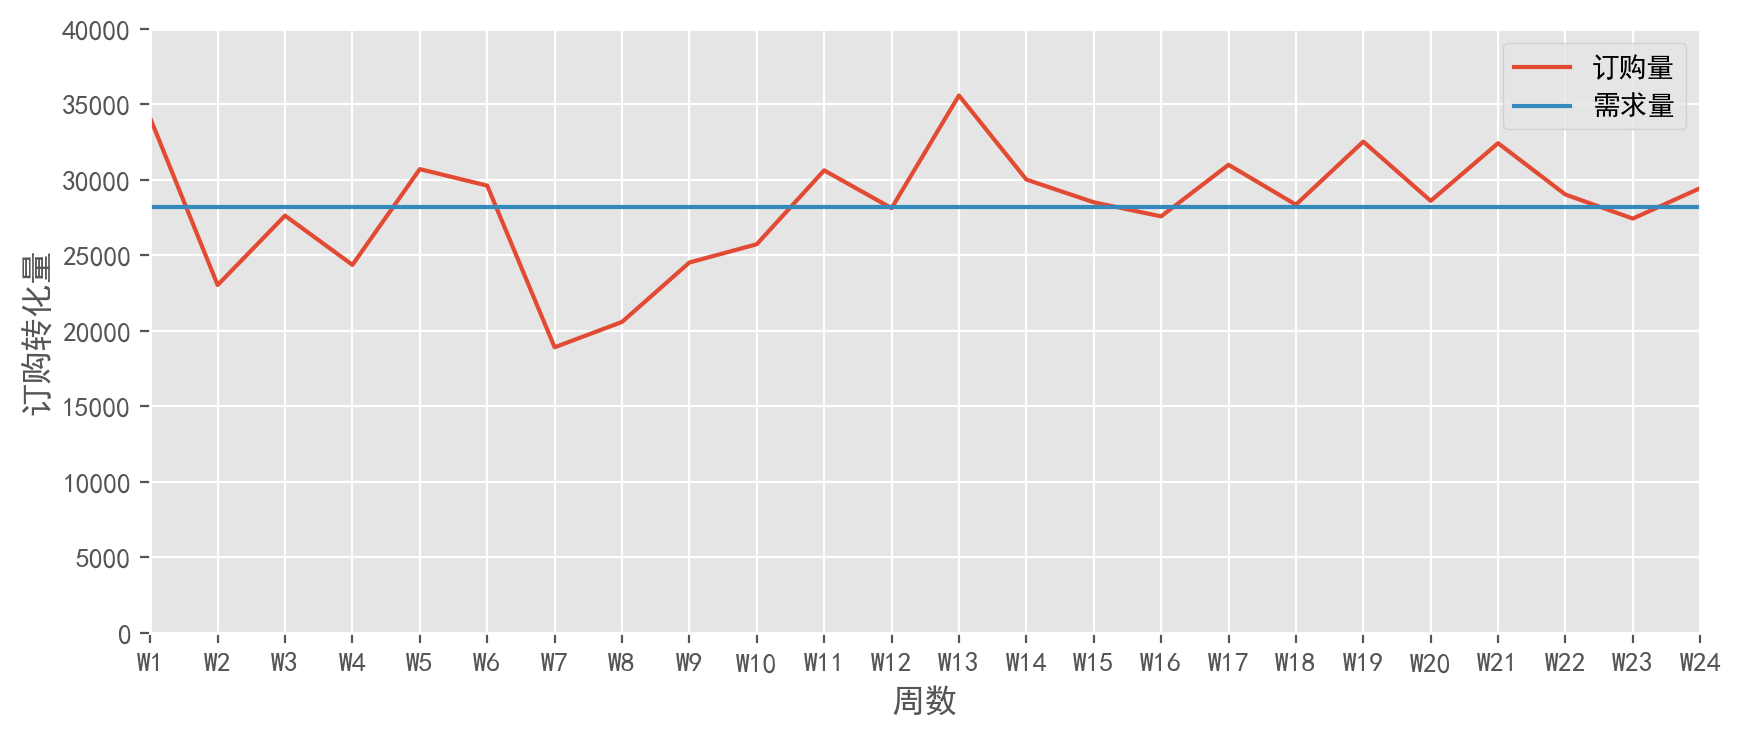

In [68]:
plt.style.use('ggplot')
y=file_a.iloc[-1,:].values
plt.figure(figsize=(10,4),dpi=200)
x_tick_24=['W'+str(i+1) for i in range(24)]
y2=np.zeros((24,1))
x_b=np.arange(24)
for i in range(24):
    tmp=np.sum(ai_np*file_a_np[:,i]*(1/0.6)+bi_np*file_a_np[:,i]*(1/0.66)+ci_np*file_a_np[:,i]*(1/0.72))
    print(tmp)
    y2[i,0]=tmp
line=28200*np.ones((24,1))
plt.plot(x_b,y2,linewidth=1.5)
plt.plot(x_b,line,linewidth=1.5)
plt.xticks(x_b,x_tick_24)
plt.xlim([0,23])
plt.ylim([0,40000])
plt.xlabel("周数")
plt.ylabel("订购转化量")
plt.legend(["订购量","需求量"])


Text(0, 0.5, '订购量归一化')

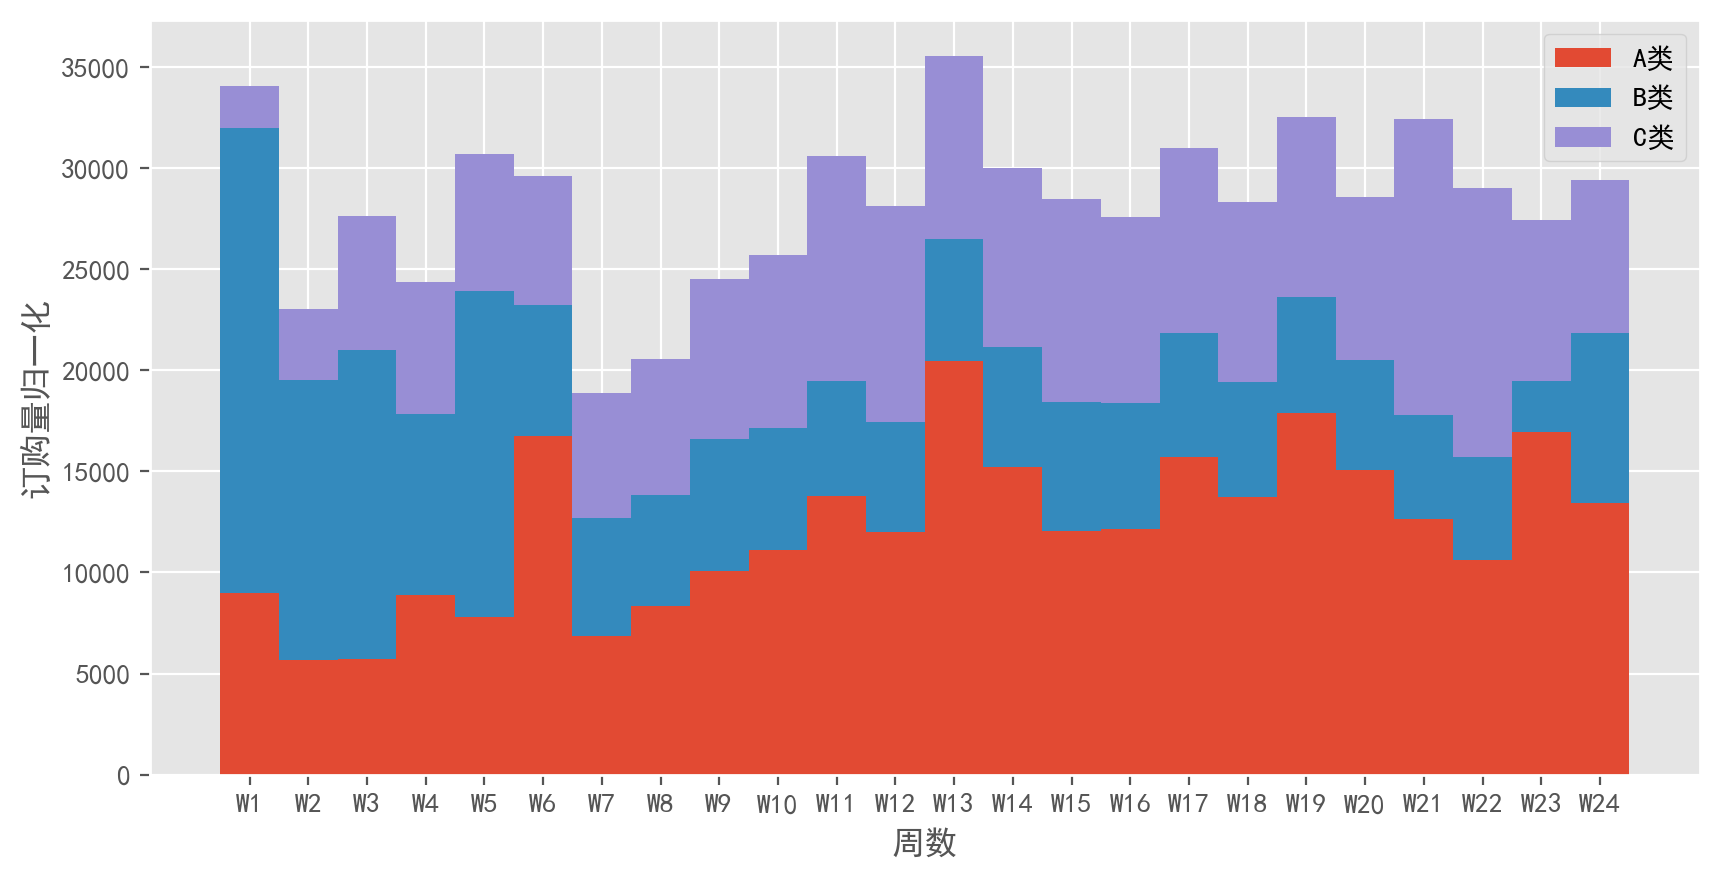

In [34]:
s_1=np.zeros(24)
s_2=np.zeros(24)
s_3=np.zeros(24)
for i in range(24):
    s_1[i]=np.sum(ai_np*file_a_np[:,i]*(1/0.6))
    s_2[i]=np.sum(bi_np*file_a_np[:,i]*(1/0.66))
    s_3[i]=np.sum(ci_np*file_a_np[:,i]*(1/0.72))
plt.figure(figsize=(10,5),dpi=200)
plt.bar(x_tick_24,s_1,width=1,bottom=0)
plt.bar(x_tick_24,s_2,width=1,bottom=s_1)
plt.bar(x_tick_24,s_3,width=1,bottom=s_1+s_2)
plt.legend(["A类","B类","C类"])
plt.xlabel("周数")
plt.ylabel("订购量归一化")


In [69]:
A_2=s_1
C_2=s_3

(0.0, 1.0)

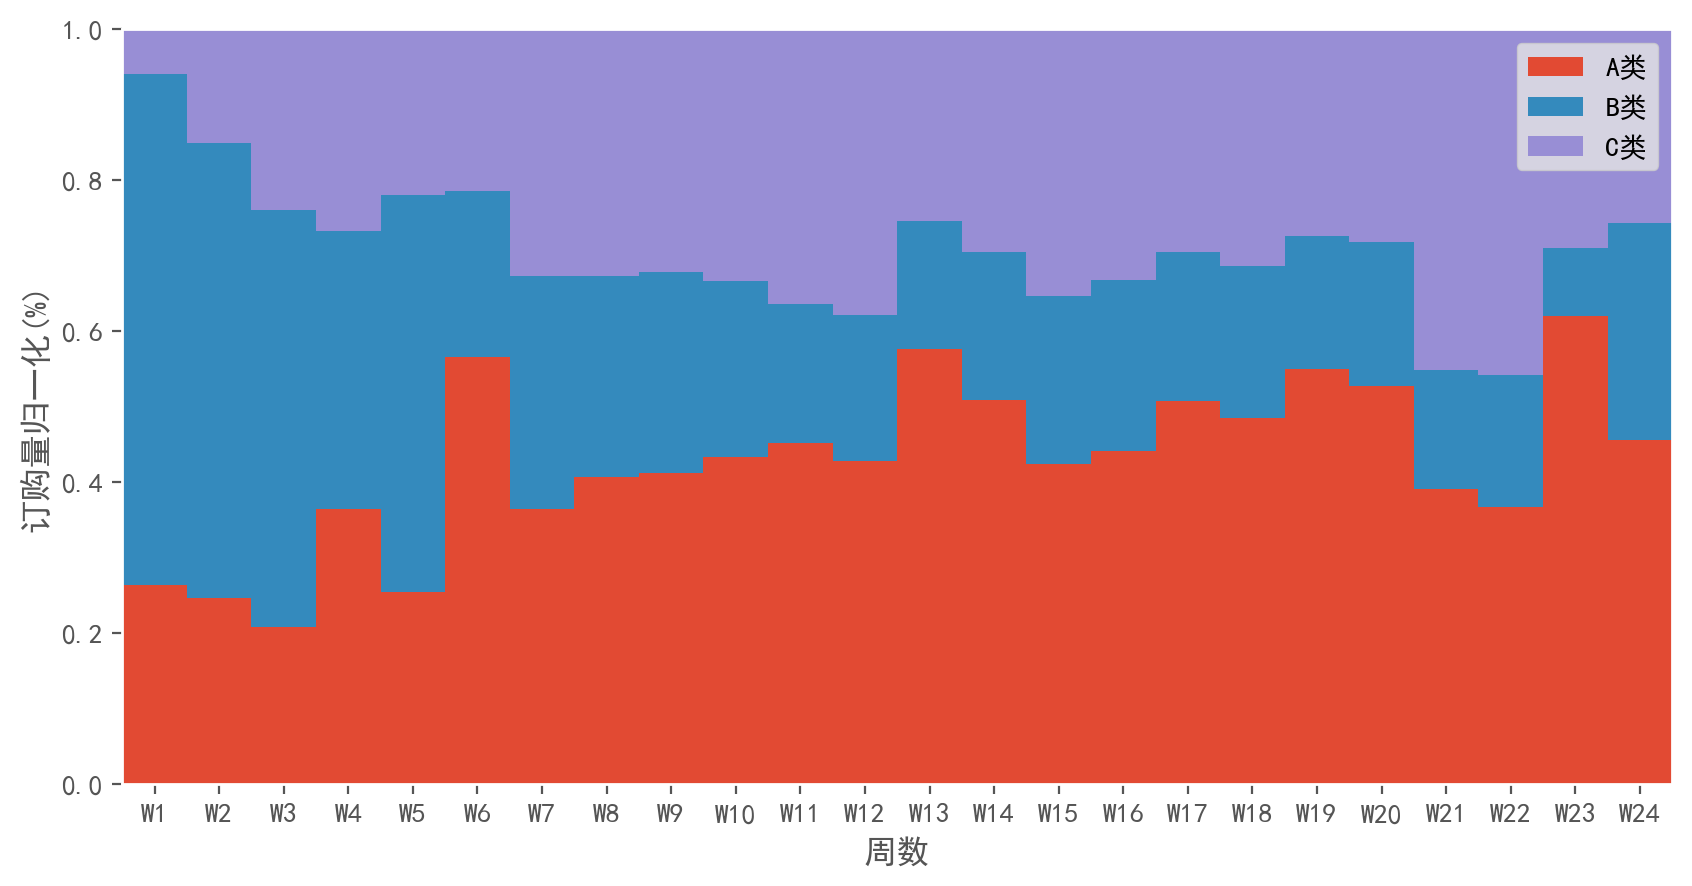

In [39]:
sum_abc=s_1+s_2+s_3
s_1_per=s_1/sum_abc
s_2_per=s_2/sum_abc
s_3_per=s_3/sum_abc
plt.figure(figsize=(10,5),dpi=200)
plt.bar(x_tick_24,s_1_per,width=1,bottom=0)
plt.bar(x_tick_24,s_2_per,width=1,bottom=s_1_per)
plt.bar(x_tick_24,s_3_per,width=1,bottom=s_1_per+s_2_per)
plt.legend(["A类","B类","C类"])
plt.xlabel("周数")
plt.ylabel("订购量归一化(%)")
plt.xlim([-0.5,23.5])
plt.ylim([0,1])

28200.833333333314
27297.853535353534
29101.33838383838
24354.166666666664
30695.4797979798
29550.934343434343
18896.590909090908
20574.419191919194
24510.656565656565
25721.035353535353
30613.20707070707
28109.19191919192
35572.24747474748
30003.91414141414
28499.41919191919
27565.959595959597
30981.4898989899
28341.26262626262
32516.136363636364
28591.641414141417
32503.308080808078
28199.19191919192
28200.025252525254
28199.97474747475


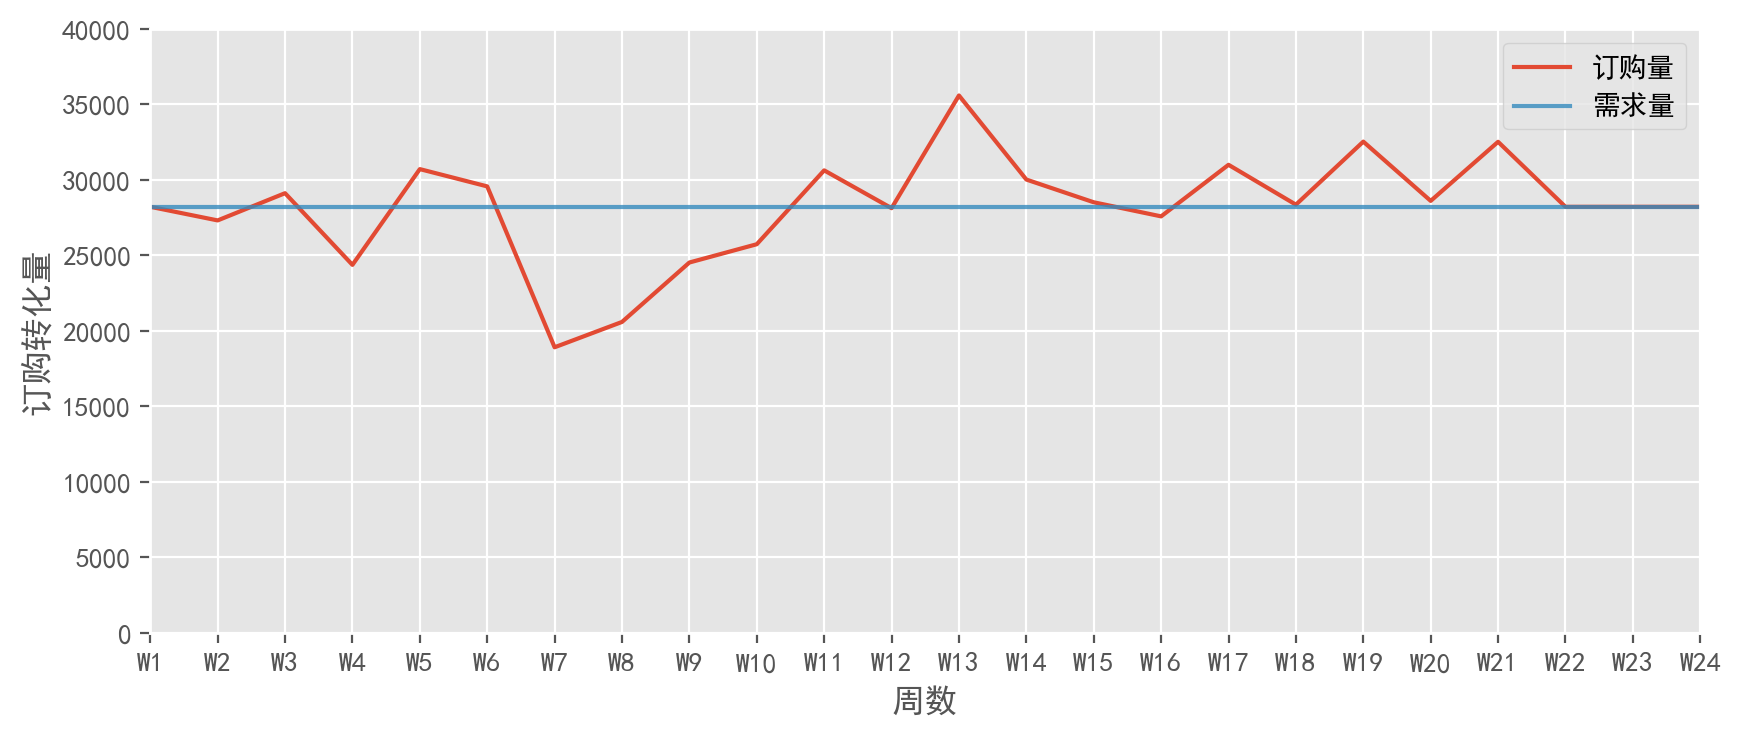

In [78]:
file_a=pd.read_excel(r"C:\Users\ZuYong\Documents\VScode\Math_models_algorithm\2021C\附件A 订购方案数据结果.xlsx",1,index_col=0)
file_a=file_a.fillna(0)


file_a.iloc[5,0]=0
file_a_np=np.array(file_a.iloc[5:407,:].values,dtype=np.float64)

# np.sum(ai_np*file_a_np[:,23]*(1/0.6))
plt.style.use('ggplot')
y=file_a.iloc[-1,:].values
plt.figure(figsize=(10,4),dpi=200)
x_tick_24=['W'+str(i+1) for i in range(24)]
y2=np.zeros((24,1))
x_b=np.arange(24)
for i in range(24):
    tmp=np.sum(ai_np*file_a_np[:,i]*(1/0.6)+bi_np*file_a_np[:,i]*(1/0.66)+ci_np*file_a_np[:,i]*(1/0.72))
    print(tmp)
    y2[i,0]=tmp
line=28200*np.ones((24,1))
plt.plot(x_b,y2,linewidth=1.5)
plt.plot(x_b,line,linewidth=1.5,alpha=0.8)
plt.xticks(x_b,x_tick_24)
plt.xlim([0,23])
plt.ylim([0,40000])
plt.xlabel("周数")
plt.ylabel("订购转化量")
plt.legend(["订购量","需求量"])

Text(0, 0.5, '订购量归一化')

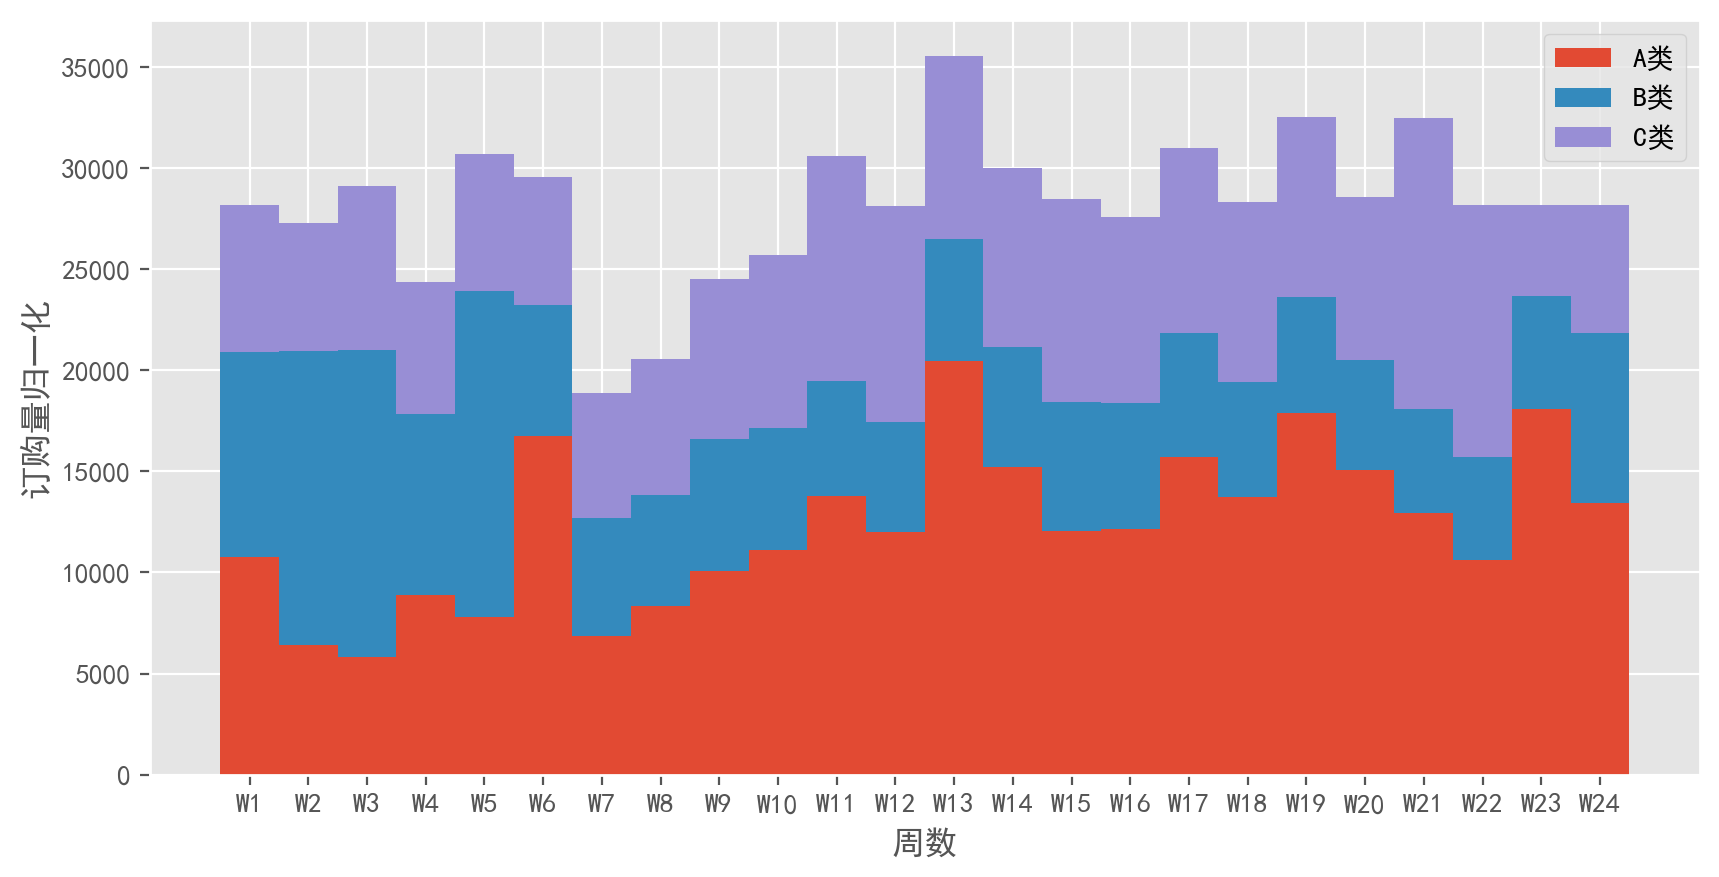

In [79]:
s_1=np.zeros(24)
s_2=np.zeros(24)
s_3=np.zeros(24)
for i in range(24):
    s_1[i]=np.sum(ai_np*file_a_np[:,i]*(1/0.6))
    s_2[i]=np.sum(bi_np*file_a_np[:,i]*(1/0.66))
    s_3[i]=np.sum(ci_np*file_a_np[:,i]*(1/0.72))
plt.figure(figsize=(10,5),dpi=200)
plt.bar(x_tick_24,s_1,width=1,bottom=0)
plt.bar(x_tick_24,s_2,width=1,bottom=s_1)
plt.bar(x_tick_24,s_3,width=1,bottom=s_1+s_2)
plt.legend(["A类","B类","C类"])
plt.xlabel("周数")
plt.ylabel("订购量归一化")

In [80]:
A_3=s_1
C_3=s_3

(0.0, 1.0)

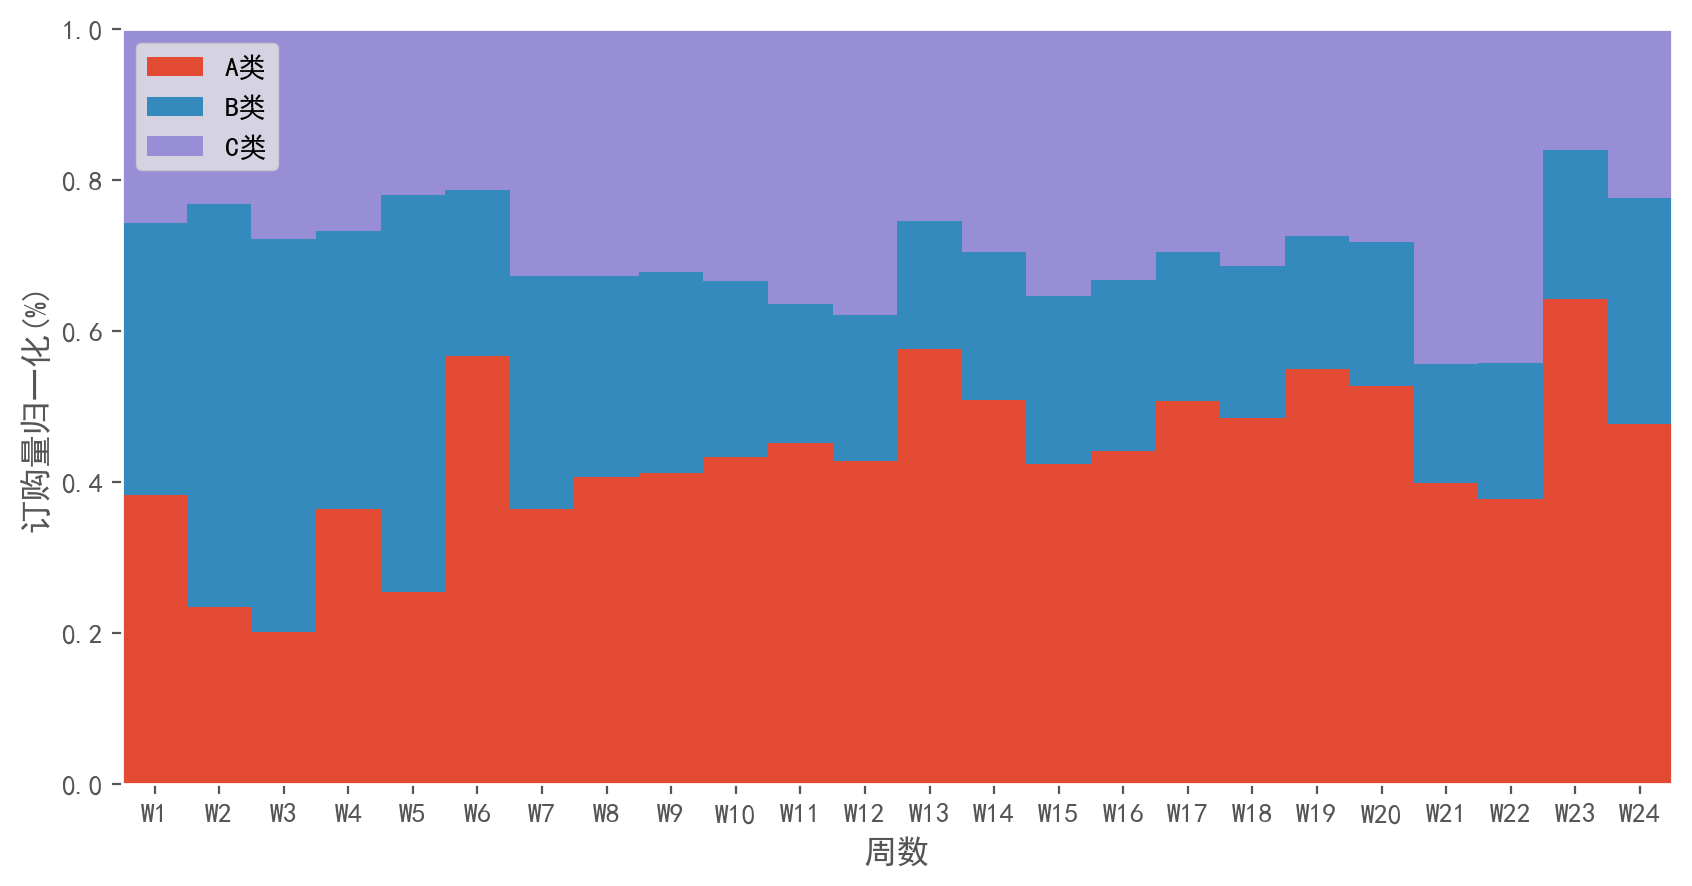

In [62]:
sum_abc=s_1+s_2+s_3
s_1_per=s_1/sum_abc
s_2_per=s_2/sum_abc
s_3_per=s_3/sum_abc
plt.figure(figsize=(10,5),dpi=200)
plt.bar(x_tick_24,s_1_per,width=1,bottom=0)
plt.bar(x_tick_24,s_2_per,width=1,bottom=s_1_per)
plt.bar(x_tick_24,s_3_per,width=1,bottom=s_1_per+s_2_per)
plt.legend(["A类","B类","C类"])
plt.xlabel("周数")
plt.ylabel("订购量归一化(%)")
plt.xlim([-0.5,23.5])
plt.ylim([0,1])

32001.0101010101
27326.18686868687
30263.333333333336
24381.13636363636
30696.994949494947
30961.767676767675
18896.590909090908
20579.26767676768
24521.287878787876
25765.530303030304
30661.893939393936
28147.904040404042
35602.75252525253
30022.5
28536.843434343435
27597.828282828283
31022.272727272728
28372.196969696968
32528.88888888889
28631.212121212127
33785.0505050505
31493.434343434343
36468.28282828283
31317.626262626265


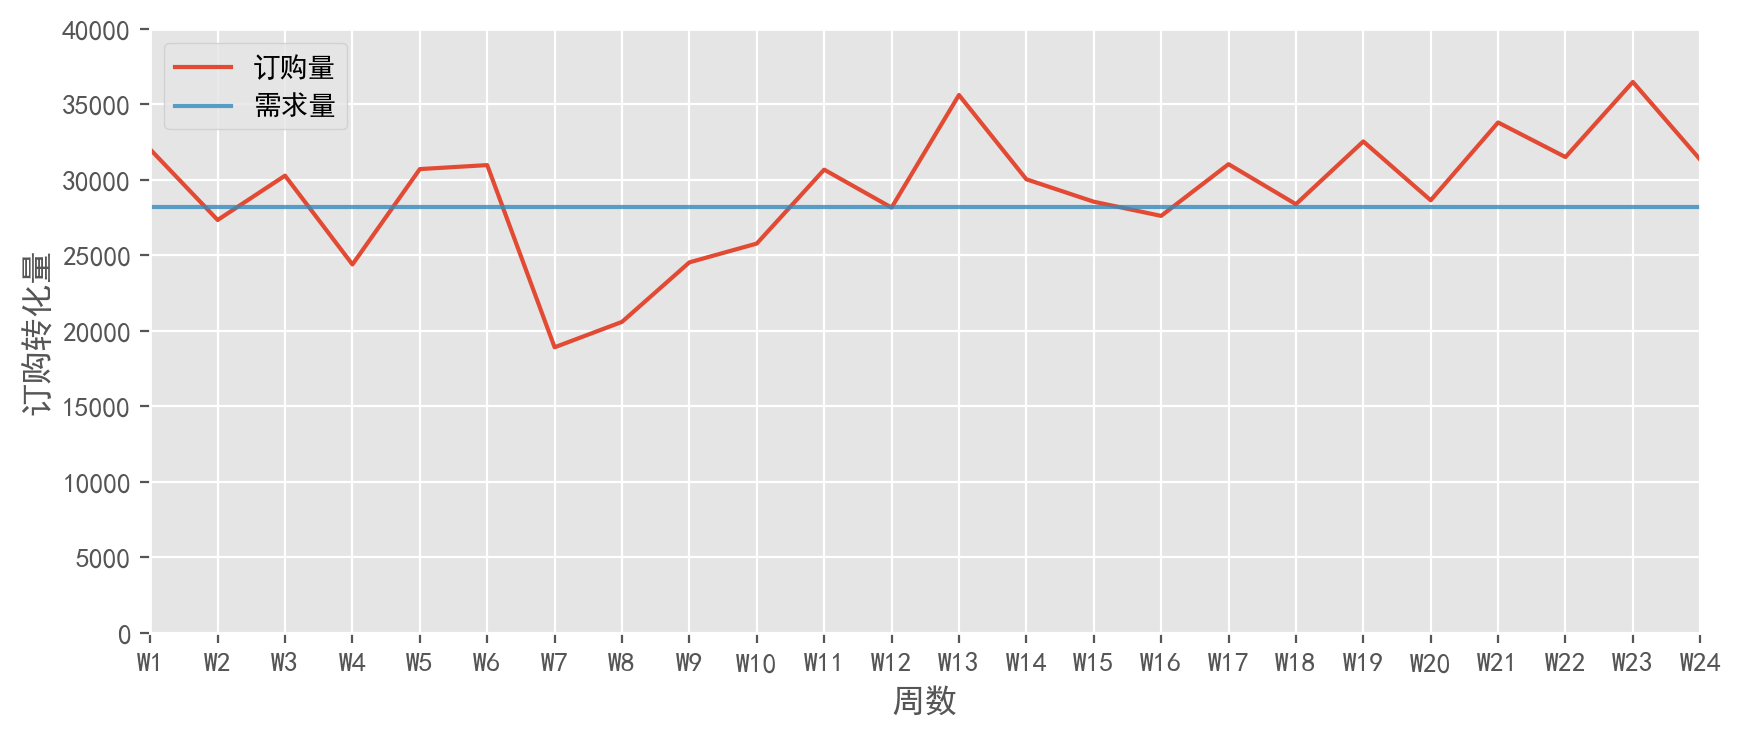

In [81]:
file_a=pd.read_excel(r"C:\Users\ZuYong\Documents\VScode\Math_models_algorithm\2021C\附件A 订购方案数据结果.xlsx",2,index_col=0)
file_a=file_a.fillna(0)


# file_a.iloc[5,0]=0
file_a_np=np.array(file_a.iloc[5:407,:].values,dtype=np.float64)

# np.sum(ai_np*file_a_np[:,23]*(1/0.6))
plt.style.use('ggplot')
y=file_a.iloc[-1,:].values
plt.figure(figsize=(10,4),dpi=200)
x_tick_24=['W'+str(i+1) for i in range(24)]
y2=np.zeros((24,1))
x_b=np.arange(24)
for i in range(24):
    tmp=np.sum(ai_np*file_a_np[:,i]*(1/0.6)+bi_np*file_a_np[:,i]*(1/0.66)+ci_np*file_a_np[:,i]*(1/0.72))
    print(tmp)
    y2[i,0]=tmp
line=28200*np.ones((24,1))
plt.plot(x_b,y2,linewidth=1.5)
plt.plot(x_b,line,linewidth=1.5,alpha=0.8)
plt.xticks(x_b,x_tick_24)
plt.xlim([0,23])
plt.ylim([0,40000])
plt.xlabel("周数")
plt.ylabel("订购转化量")
plt.legend(["订购量","需求量"])

Text(0, 0.5, '订购量归一化')

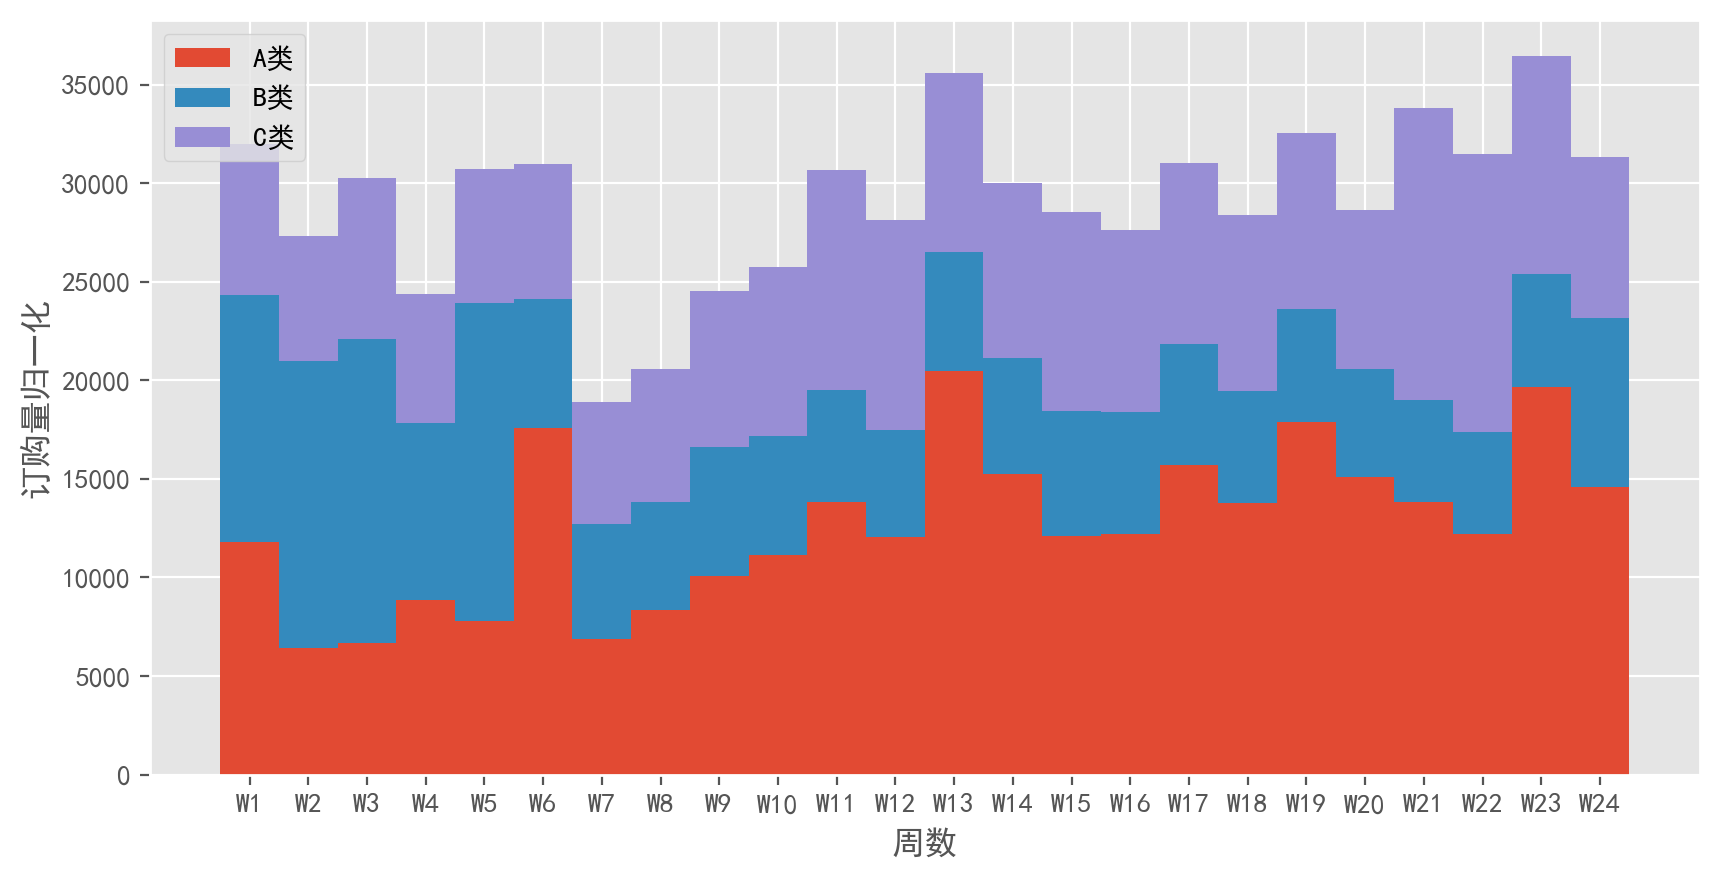

In [82]:
s_1=np.zeros(24)
s_2=np.zeros(24)
s_3=np.zeros(24)
for i in range(24):
    s_1[i]=np.sum(ai_np*file_a_np[:,i]*(1/0.6))
    s_2[i]=np.sum(bi_np*file_a_np[:,i]*(1/0.66))
    s_3[i]=np.sum(ci_np*file_a_np[:,i]*(1/0.72))

plt.figure(figsize=(10,5),dpi=200)
plt.bar(x_tick_24,s_1,width=1,bottom=0)
plt.bar(x_tick_24,s_2,width=1,bottom=s_1)
plt.bar(x_tick_24,s_3,width=1,bottom=s_1+s_2)
plt.legend(["A类","B类","C类"])
plt.xlabel("周数")
plt.ylabel("订购量归一化")

In [83]:
A_4=s_1
C_4=s_3

(0.0, 1.0)

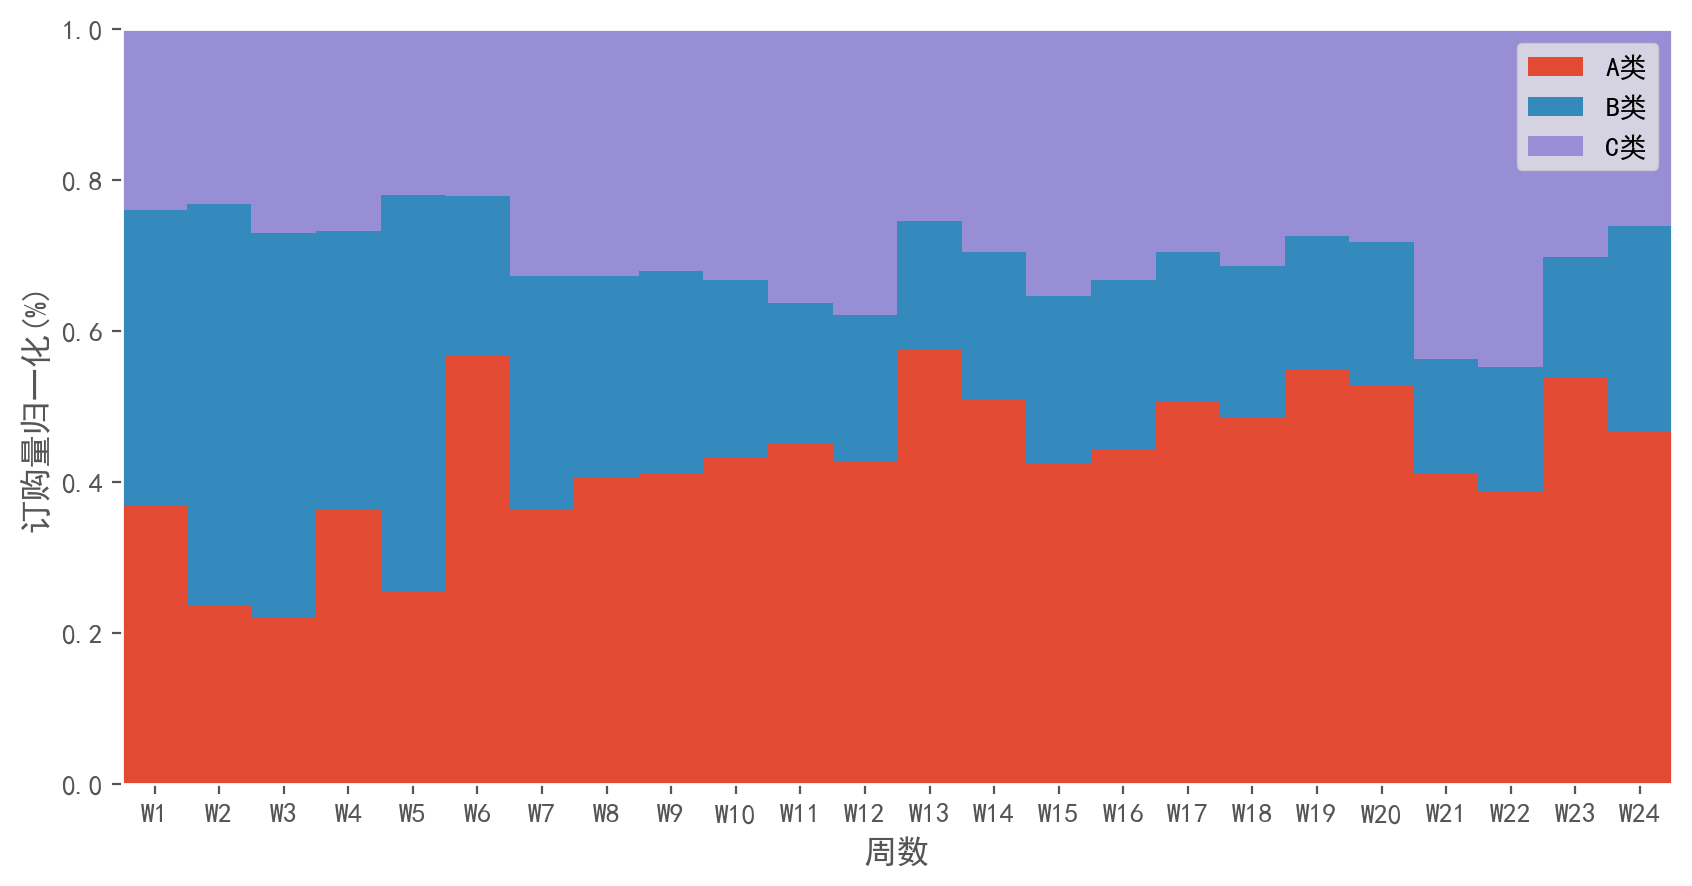

In [66]:
sum_abc=s_1+s_2+s_3
s_1_per=s_1/sum_abc
s_2_per=s_2/sum_abc
s_3_per=s_3/sum_abc
plt.figure(figsize=(10,5),dpi=200)
plt.bar(x_tick_24,s_1_per,width=1,bottom=0)
plt.bar(x_tick_24,s_2_per,width=1,bottom=s_1_per)
plt.bar(x_tick_24,s_3_per,width=1,bottom=s_1_per+s_2_per)
plt.legend(["A类","B类","C类"])
plt.xlabel("周数")
plt.ylabel("订购量归一化(%)")
plt.xlim([-0.5,23.5])
plt.ylim([0,1])

In [97]:
tmp=(A_3-A_2)/A_2
print(tmp)

[-0.08579505 -0.00440757 -0.12708697 -0.0015015   0.         -0.04736143
  0.         -0.00039849 -0.00016521 -0.00253921 -0.00276908 -0.00249066
 -0.00105786 -0.00065602 -0.0016554  -0.00164181 -0.00159033 -0.0018162
 -0.00046603 -0.00242933 -0.06347103 -0.12928328 -0.07995591 -0.08095456]


In [98]:
tmp.mean()

-0.026645538358390692

In [93]:
tmp_c=(C_3-C_2)/C_2

In [94]:
tmp_c.mean()

-0.04609392313707881

In [105]:
tmp_c=(C_4-C_3)/C_3
tmp_c.mean()


0.0855414013016592

In [106]:
((A_4-A_3)/A_3).mean()

0.029418327357977125

### AC

In [123]:
file_a=pd.read_excel(r"C:\Users\ZuYong\Documents\VScode\Math_models_algorithm\2021C\第三问原始与加入惩罚因子订购方案.xlsx",0,index_col=0)
# file_a=file_a.fillna(0)
file_a_np=np.array(file_a.iloc[0:-1,:].values,dtype=np.float64)

28200.83333333333
27297.853535353534
29848.156565656565
24354.166666666664
30695.4797979798
30601.41414141414
18896.590909090908
20574.419191919194
24510.656565656565
25721.035353535353
30613.20707070707
28109.19191919192
35572.24747474748
30003.91414141414
28499.41919191919
27565.959595959597
30981.4898989899
28341.26262626262
32516.136363636364
28591.641414141417
33482.19696969697
29229.24242424123
28200.858585858587
28199.419191919194


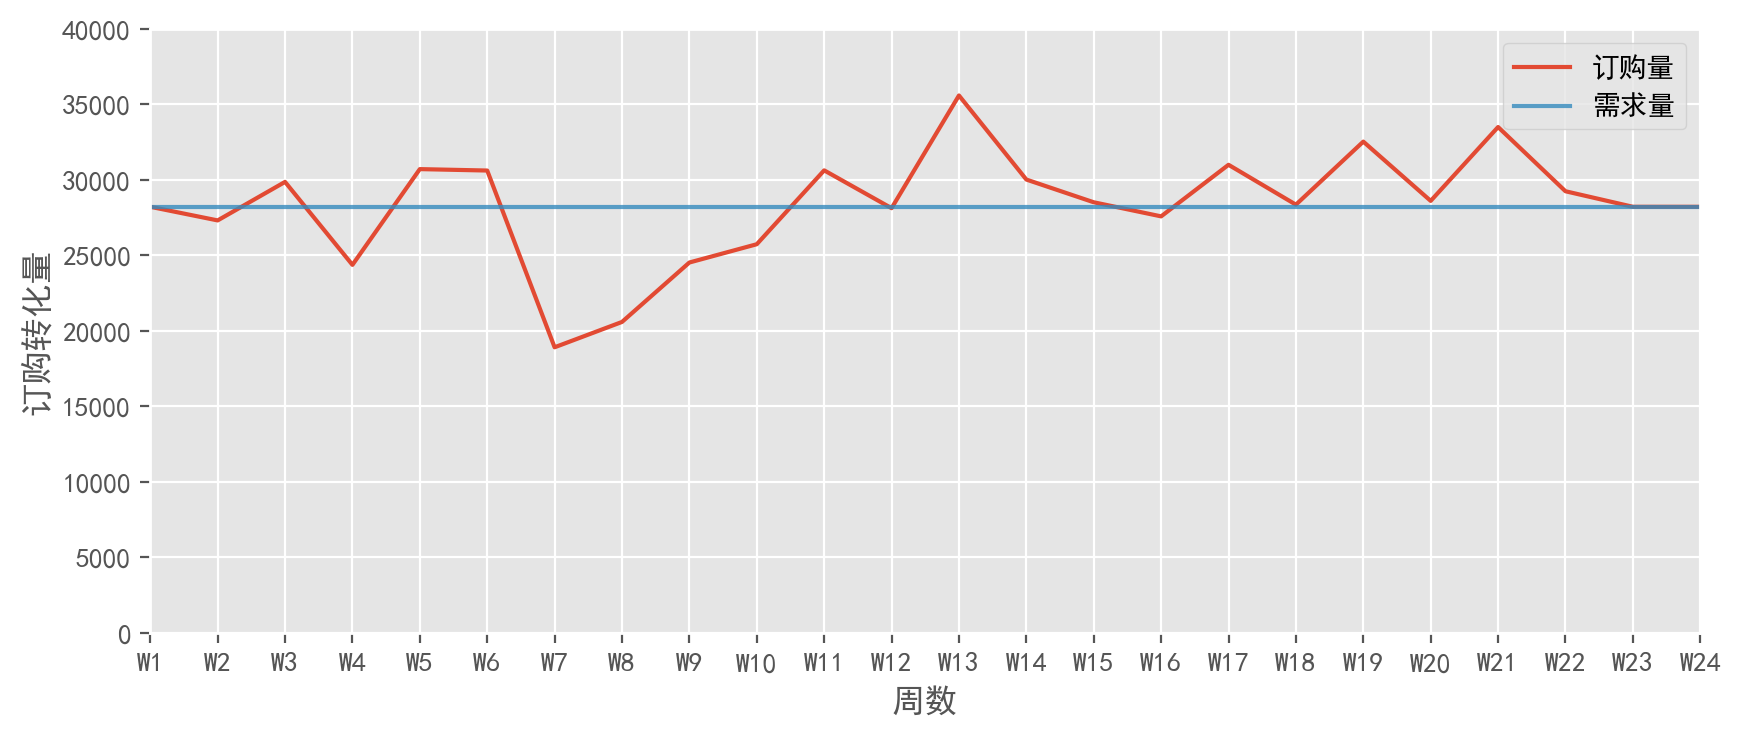

In [124]:
# np.sum(ai_np*file_a_np[:,23]*(1/0.6))
plt.style.use('ggplot')
y=file_a.iloc[-1,:].values
plt.figure(figsize=(10,4),dpi=200)
x_tick_24=['W'+str(i+1) for i in range(24)]
y2=np.zeros((24,1))
x_b=np.arange(24)
for i in range(24):
    tmp=np.sum(ai_np*file_a_np[:,i]*(1/0.6)+bi_np*file_a_np[:,i]*(1/0.66)+ci_np*file_a_np[:,i]*(1/0.72))
    print(tmp)
    y2[i,0]=tmp
line=28200*np.ones((24,1))
plt.plot(x_b,y2,linewidth=1.5)
plt.plot(x_b,line,linewidth=1.5,alpha=0.8)
plt.xticks(x_b,x_tick_24)
plt.xlim([0,23])
plt.ylim([0,40000])
plt.xlabel("周数")
plt.ylabel("订购转化量")
plt.legend(["订购量","需求量"])

Text(0, 0.5, '订购量归一化')

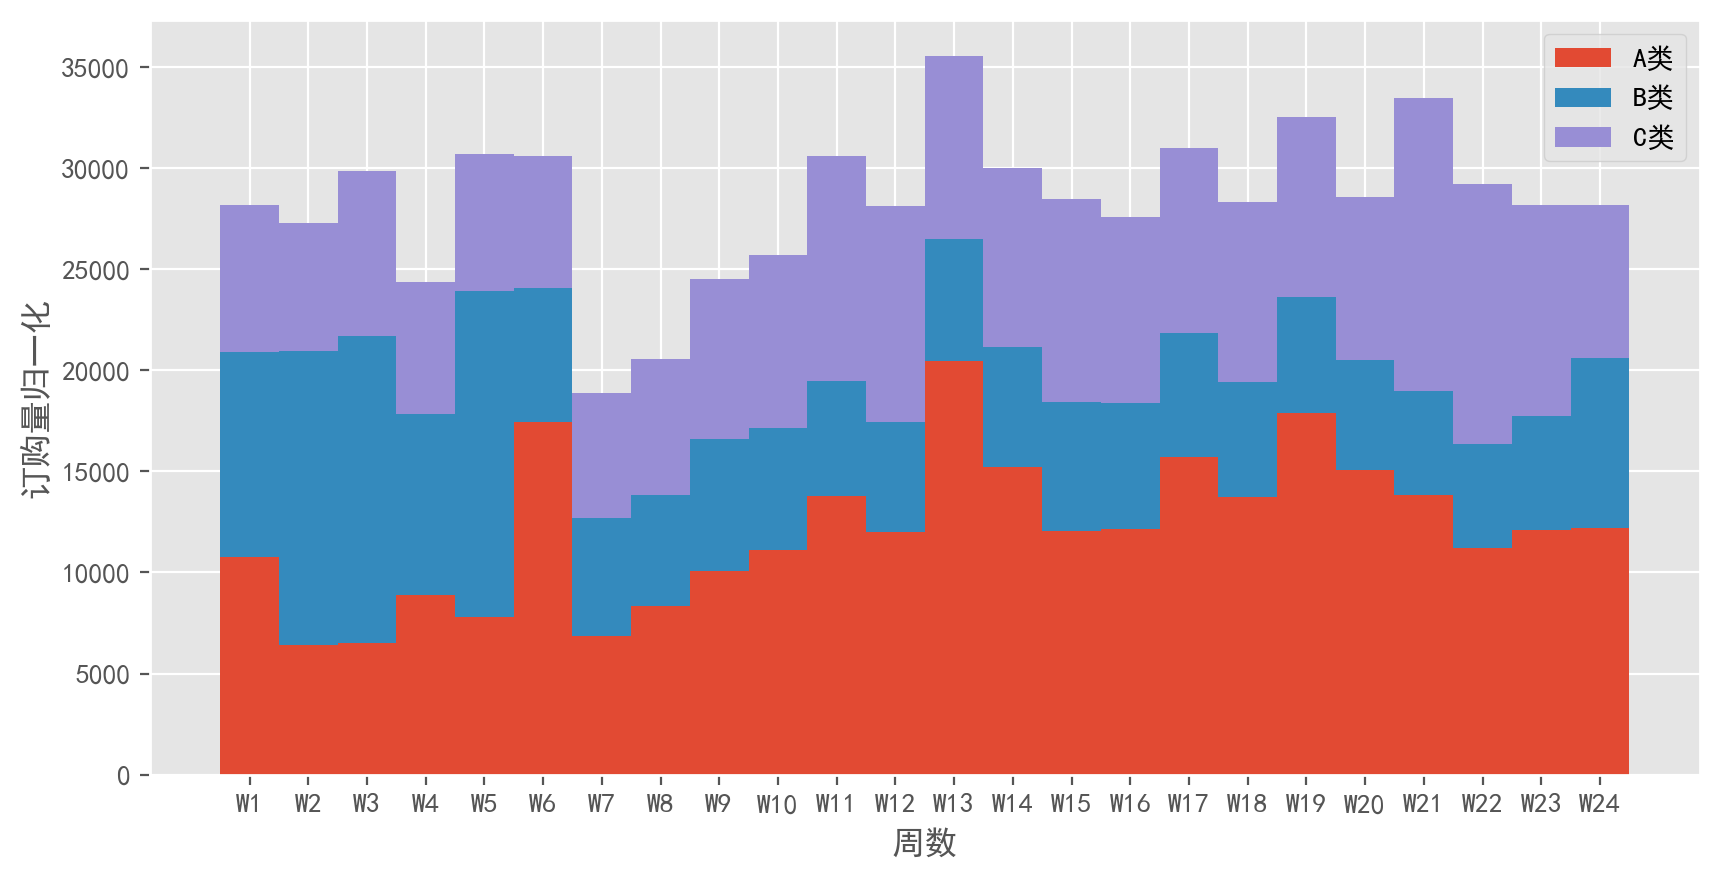

In [125]:
s_1=np.zeros(24)
s_2=np.zeros(24)
s_3=np.zeros(24)
for i in range(24):
    s_1[i]=np.sum(ai_np*file_a_np[:,i]*(1/0.6))
    s_2[i]=np.sum(bi_np*file_a_np[:,i]*(1/0.66))
    s_3[i]=np.sum(ci_np*file_a_np[:,i]*(1/0.72))

plt.figure(figsize=(10,5),dpi=200)
plt.bar(x_tick_24,s_1,width=1,bottom=0)
plt.bar(x_tick_24,s_2,width=1,bottom=s_1)
plt.bar(x_tick_24,s_3,width=1,bottom=s_1+s_2)
plt.legend(["A类","B类","C类"])
plt.xlabel("周数")
plt.ylabel("订购量归一化")

(0.0, 1.0)

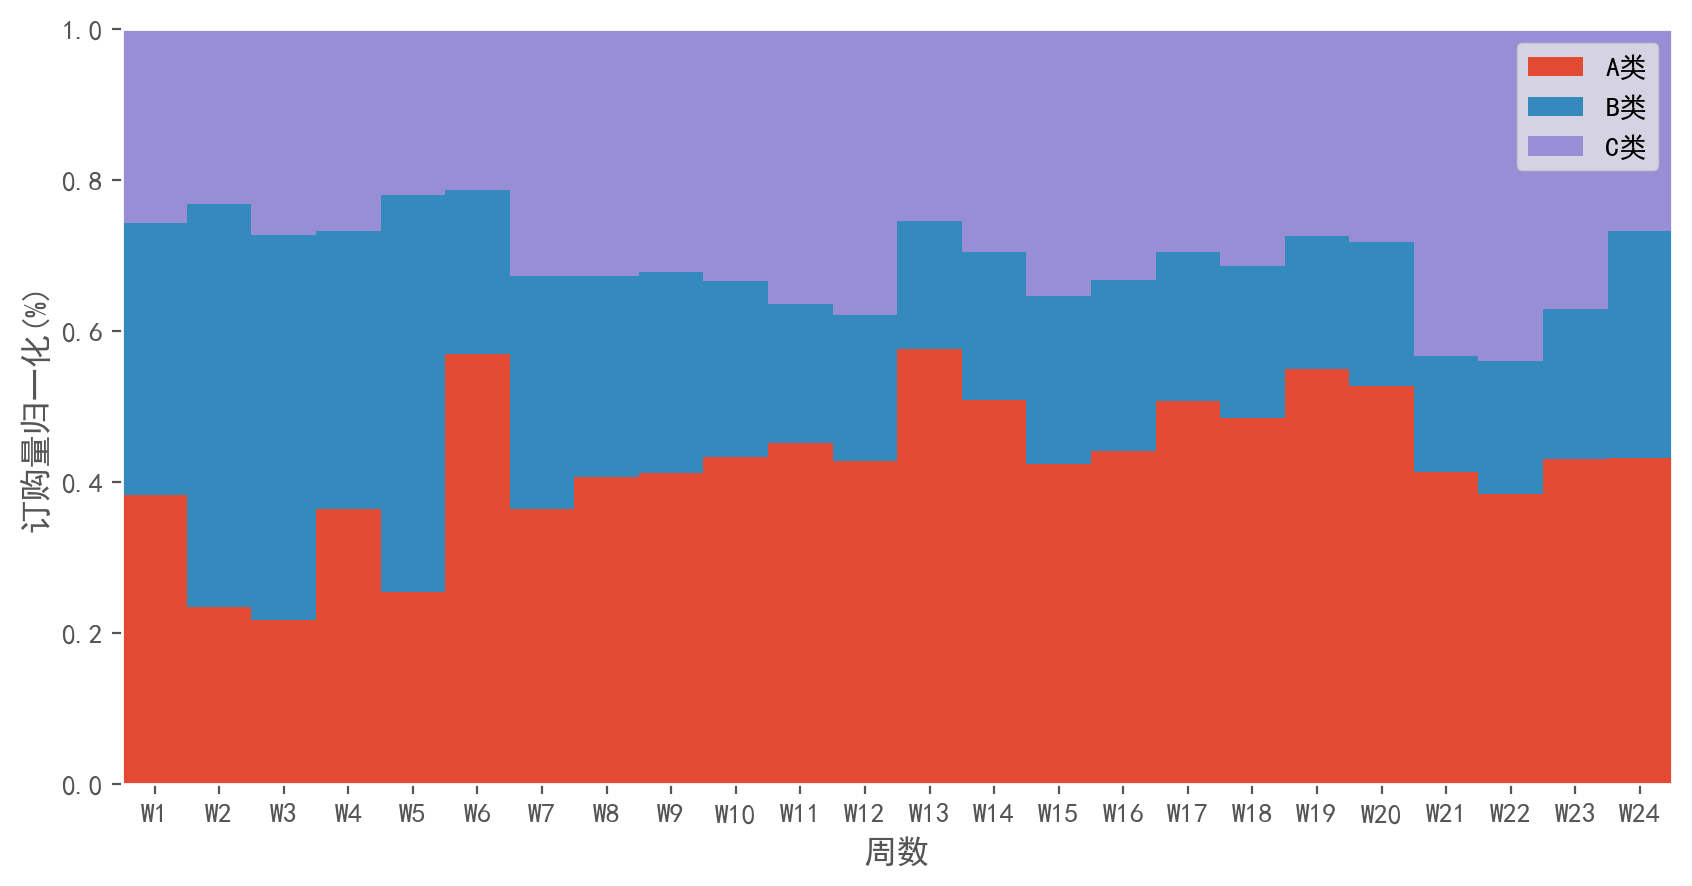

In [126]:
sum_abc=s_1+s_2+s_3
s_1_per=s_1/sum_abc
s_2_per=s_2/sum_abc
s_3_per=s_3/sum_abc
plt.figure(figsize=(10,5),dpi=200)
plt.bar(x_tick_24,s_1_per,width=1,bottom=0)
plt.bar(x_tick_24,s_2_per,width=1,bottom=s_1_per)
plt.bar(x_tick_24,s_3_per,width=1,bottom=s_1_per+s_2_per)
plt.legend(["A类","B类","C类"])
plt.xlabel("周数")
plt.ylabel("订购量归一化(%)")
plt.xlim([-0.5,23.5])
plt.ylim([0,1])

In [112]:
A_2=s_1
C_2=s_3

37017.878787878784
20172.727272727272
27409.595959595958
24354.166666666664
30695.4797979798
29550.934343434343
18896.590909090908
20574.419191919194
24510.656565656565
25721.035353535353
30613.20707070707
28109.19191919192
35572.24747474748
30003.91414141414
28499.41919191919
27565.959595959597
30981.4898989899
28341.26262626262
32516.136363636364
28591.641414141417
32503.308080808078
28199.19191919192
28200.025252525254
28199.97474747475


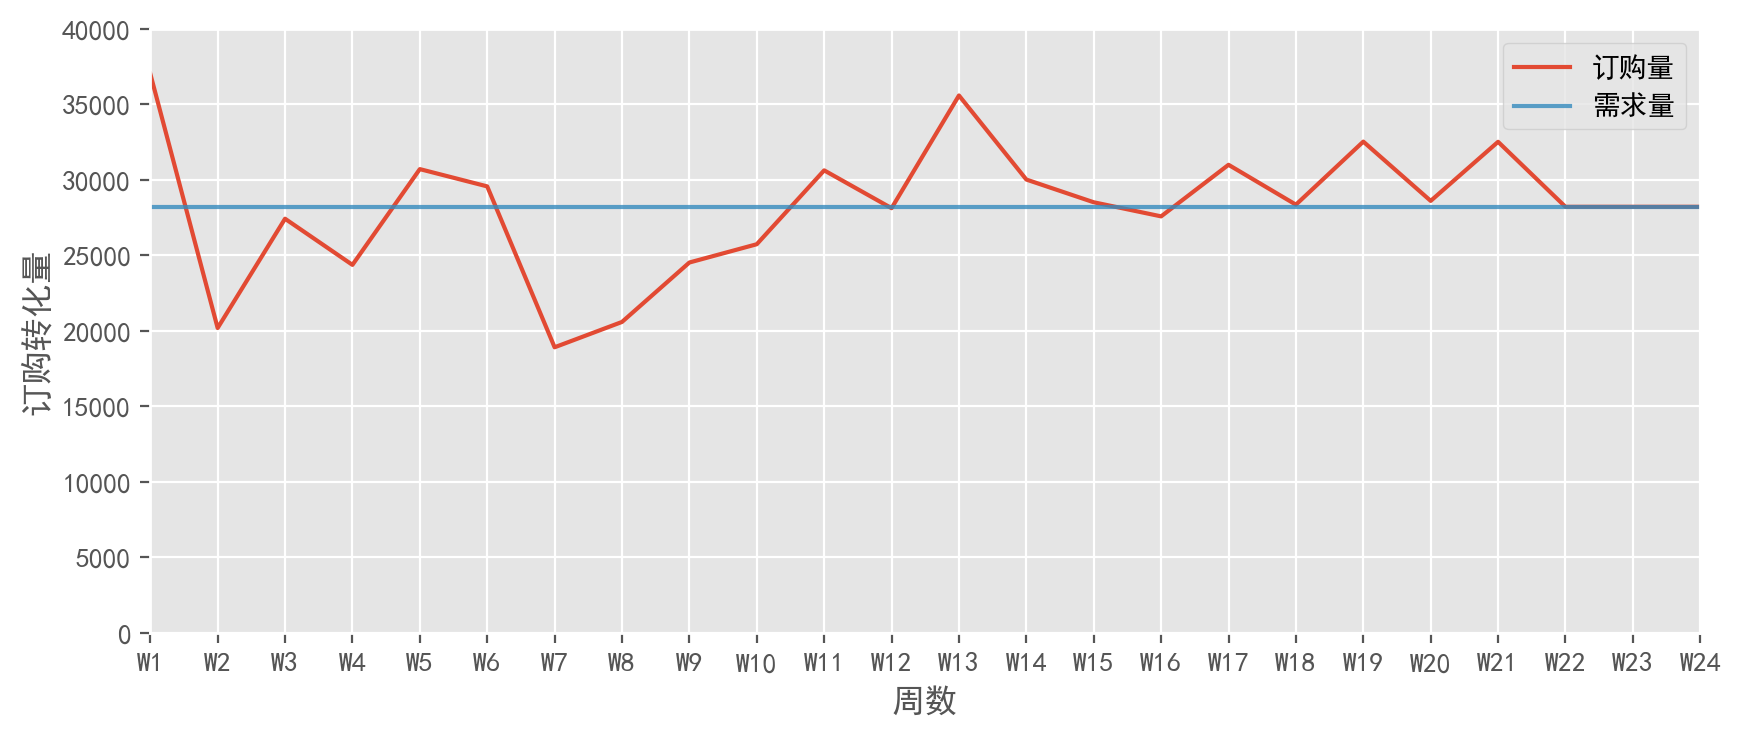

In [127]:
file_a=pd.read_excel(r"C:\Users\ZuYong\Documents\VScode\Math_models_algorithm\2021C\第三问原始与加入惩罚因子订购方案.xlsx",1,index_col=0)
# file_a=file_a.fillna(0)
file_a_np=np.array(file_a.iloc[0:-1,:].values,dtype=np.float64)
plt.style.use('ggplot')
y=file_a.iloc[-1,:].values
plt.figure(figsize=(10,4),dpi=200)
x_tick_24=['W'+str(i+1) for i in range(24)]
y2=np.zeros((24,1))
x_b=np.arange(24)
for i in range(24):
    tmp=np.sum(ai_np*file_a_np[:,i]*(1/0.6)+bi_np*file_a_np[:,i]*(1/0.66)+ci_np*file_a_np[:,i]*(1/0.72))
    print(tmp)
    y2[i,0]=tmp
line=28200*np.ones((24,1))
plt.plot(x_b,y2,linewidth=1.5)
plt.plot(x_b,line,linewidth=1.5,alpha=0.8)
plt.xticks(x_b,x_tick_24)
plt.xlim([0,23])
plt.ylim([0,40000])
plt.xlabel("周数")
plt.ylabel("订购转化量")
plt.legend(["订购量","需求量"])

Text(0, 0.5, '订购量归一化')

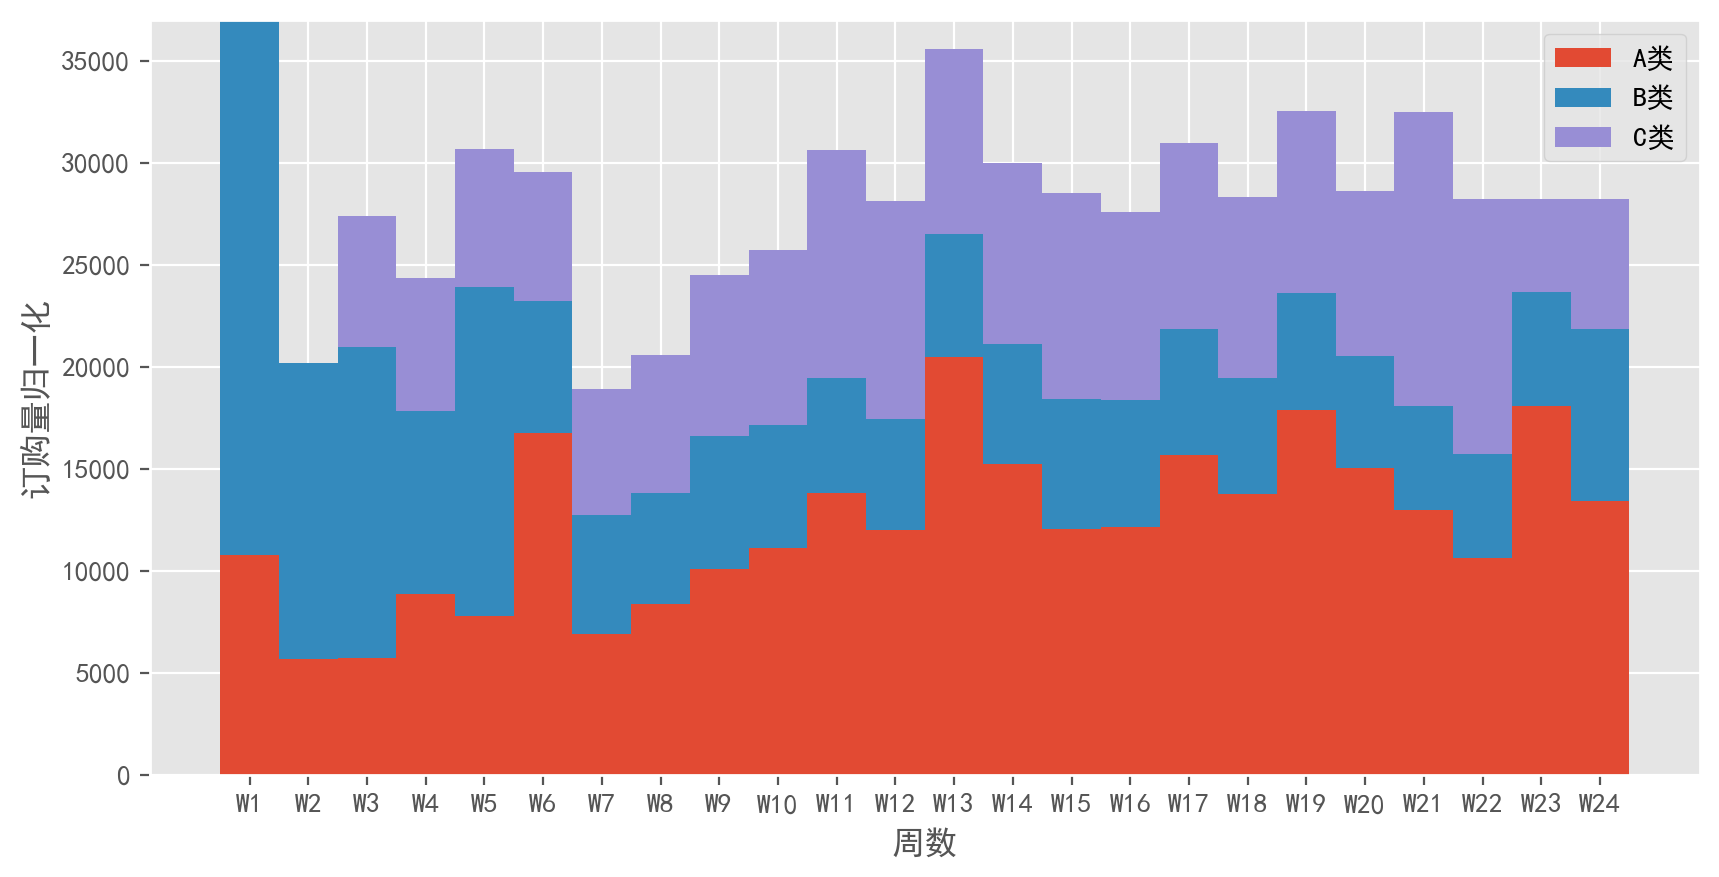

In [128]:
s_1=np.zeros(24)
s_2=np.zeros(24)
s_3=np.zeros(24)
for i in range(24):
    s_1[i]=np.sum(ai_np*file_a_np[:,i]*(1/0.6))
    s_2[i]=np.sum(bi_np*file_a_np[:,i]*(1/0.66))
    s_3[i]=np.sum(ci_np*file_a_np[:,i]*(1/0.72))

plt.figure(figsize=(10,5),dpi=200)
plt.bar(x_tick_24,s_1,width=1,bottom=0)
plt.bar(x_tick_24,s_2,width=1,bottom=s_1)
plt.bar(x_tick_24,s_3,width=1,bottom=s_1+s_2)
plt.legend(["A类","B类","C类"])
plt.xlabel("周数")
plt.ylabel("订购量归一化")

(0.0, 1.0)

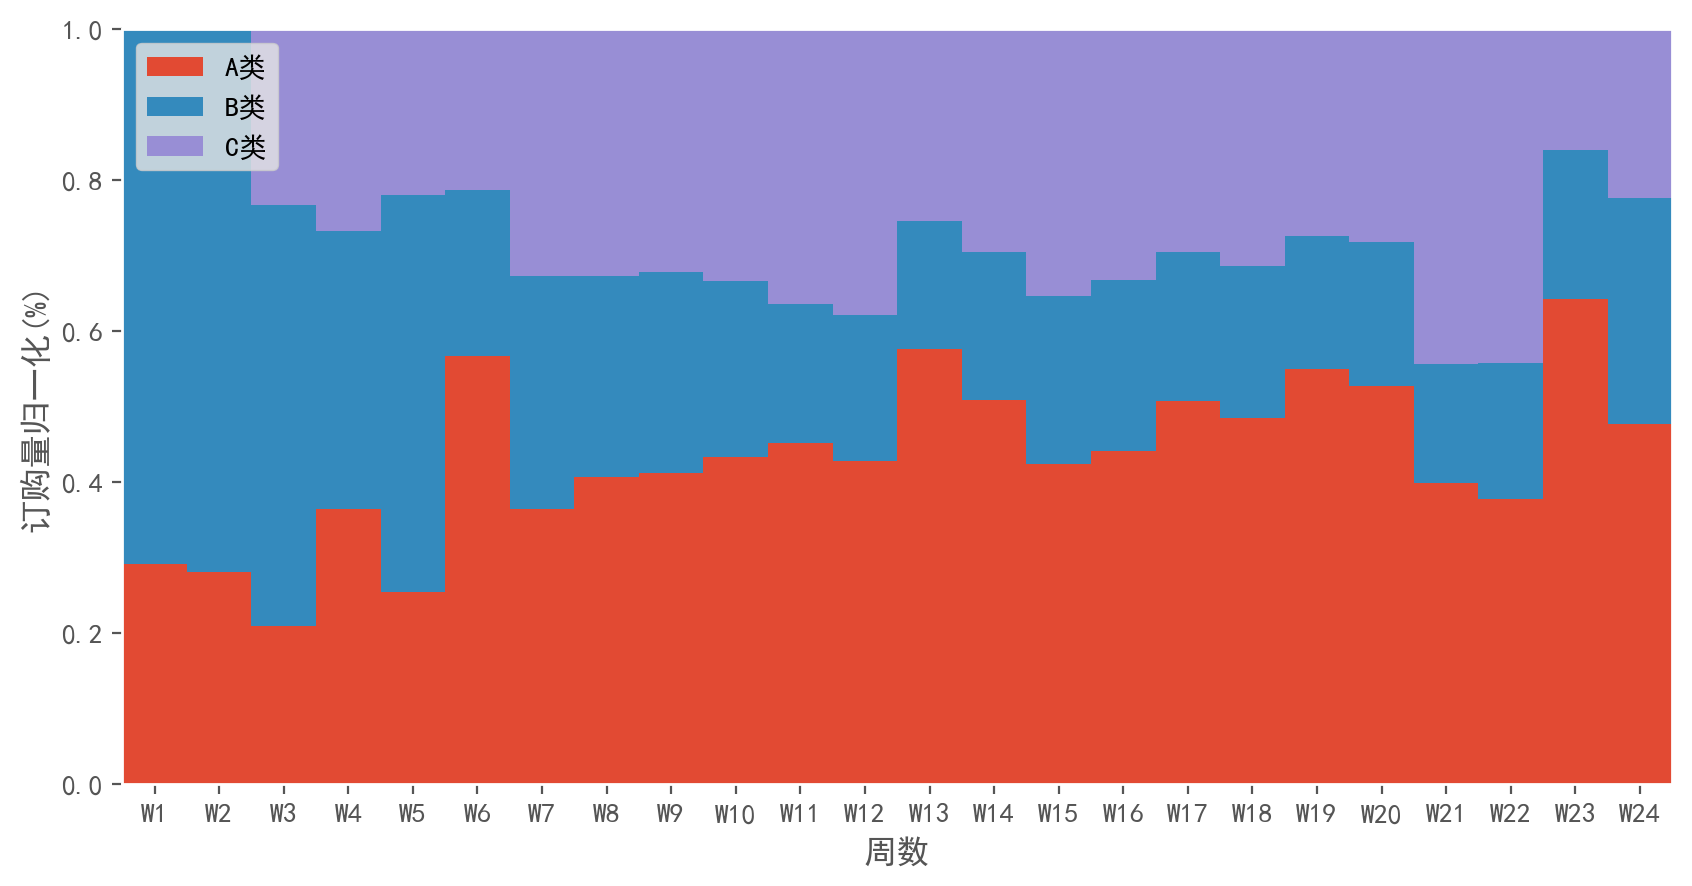

In [129]:
sum_abc=s_1+s_2+s_3
s_1_per=s_1/sum_abc
s_2_per=s_2/sum_abc
s_3_per=s_3/sum_abc
plt.figure(figsize=(10,5),dpi=200)
plt.bar(x_tick_24,s_1_per,width=1,bottom=0)
plt.bar(x_tick_24,s_2_per,width=1,bottom=s_1_per)
plt.bar(x_tick_24,s_3_per,width=1,bottom=s_1_per+s_2_per)
plt.legend(["A类","B类","C类"])
plt.xlabel("周数")
plt.ylabel("订购量归一化(%)")
plt.xlim([-0.5,23.5])
plt.ylim([0,1])

In [119]:
A_3=s_1
C_3=s_3

In [120]:
((A_3-A_2)/A_2).mean()

0.008639056205577504

In [121]:
((C_3-C_2)/C_2).mean()

-0.12556252532740209